## Ritmos corticales mu y percepción pasiva de pulso

Análisis de datos de EEG, tarea conductual y Spotify para Trabajo Integrador Final de la Licenciatura en Psicología de la Universidad Favaloro de Francisco Cossavella.

In [351]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.io import loadmat
import mat73

sns.set_context('paper', 
                font_scale=1.5, 
                rc={"lines.linewidth": 1.5},
               )

Acá importo los datos con las features extraídas en matlab

In [352]:
data_eeg = pd.DataFrame()
for i in range(1, 11):
    d = pd.read_csv(f'normalized_alpha_song{i}.csv') 
    d['song'] = i
    data_eeg = pd.concat([data_eeg, d], ignore_index=True)

In [353]:
data_eeg.head()

subjects      area  electrode           mean_alpha            std_alpha  \
0         1  left_arm         30                 0.69                 1.05   
1         1  left_arm         36                 0.66                 1.05   
2         1  left_arm         37                 0.82                 1.30   
3         1  left_arm         41                 0.76                 1.22   
4         1  left_arm         42                 0.83                 1.33   

         time_over_std  song  
0                 0.82     1  
1                 0.76     1  
2                 0.70     1  
3                 0.70     1  
4                 0.65     1

In [354]:
data_eeg.columns = data_eeg.columns.str.capitalize()

In [355]:
data_tapit = pd.read_csv('Tapit_entropy.csv')
data_spotify = pd.read_excel('Spotify_data.xlsx')
data_ratings = mat73.loadmat('behavioralRatings.mat')
data_subjects = loadmat('participantInfo.mat')
data_pulse = pd.read_csv('pulse_clarity.csv')

In [356]:
songs = {1: 'First Fires', 2: 'Oino', 3: 'Tiptoes', 4: 'Careless Love', 5: 'Lebanese Blonde',
         6: 'Canopée', 7: 'Doing Yoga', 8: 'Until the Sun Needs to Rise', 9: 'Silent Shout', 10: 'The Last Thing You Should Do'}

In [357]:
data_eeg['Song'] = data_eeg.Song.map(songs)

In [358]:
data_eeg

Subjects      Area  Electrode           Mean_alpha            Std_alpha  \
0            1  left_arm         30                 0.69                 1.05   
1            1  left_arm         36                 0.66                 1.05   
2            1  left_arm         37                 0.82                 1.30   
3            1  left_arm         41                 0.76                 1.22   
4            1  left_arm         42                 0.83                 1.33   
...        ...       ...        ...                  ...                  ...   
2995        20  leg_area          7                 0.70                 1.02   
2996        20  leg_area         31                 0.83                 1.21   
2997        20  leg_area         55                 0.87                 1.26   
2998        20  leg_area         80                 0.91                 1.39   
2999        20  leg_area        106                 0.58                 0.83   

            Time_over_std                          Song  
0                    0.82                   First Fires  
1                    0.76                   First Fires  
2                    0.70                   First Fires  
3                    0.70                   First Fires  
4                    0.65                   First Fires  
...                   ...                           ...  
2995                 0.55  The Last Thing You Should Do  
2996                 0.43  The Last Thing You Should Do  
2997                 0.40  The Last Thing You Should Do  
2998                 0.33  The Last Thing You Should Do  
2999                 0.71  The Last Thing You Should Do  

[3000 rows x 7 columns]

In [359]:
Familiarity = []
Enjoyment = []

for j in data_ratings['behavioralRatings']: 
    for i in j:
        Familiarity.append(int(i[0]))
        Enjoyment.append(int(i[1]))

In [360]:
data_ratings = pd.DataFrame(list(zip(Familiarity, Enjoyment)), columns=['Familiarity', 'Enjoyment'])
data_ratings

Familiarity  Enjoyment
0              1          8
1              1          8
2              1          5
3              1          5
4              9          9
..           ...        ...
195            2          9
196            1          4
197            2          6
198            1          8
199            1          1

[200 rows x 2 columns]

In [361]:
Subject = np.arange(1, 21)
Age = []
Training = []
Listening = []

for j in data_subjects['participantInfo'][0]:
    Age.append(int(j['age'].item()))
    Training.append(int(j['nYearsTraining'].item()))
    Listening.append(int(j['weeklyListening'].item()))

In [362]:
data_subjects = pd.DataFrame(list(zip(Subject, Age, Training, Listening)), columns=['Subject', 'Age', 'Training', 'Listening'])
data_subjects

Subject  Age  Training  Listening
0         1   25         2         28
1         2   18        11          7
2         3   29        24          7
3         4   24         8         21
4         5   22         0          5
5         6   24         4         17
6         7   19         0         31
7         8   23         0         23
8         9   20         1         14
9        10   23        12         28
10       11   23         6          7
11       12   22         6         10
12       13   19         8          3
13       14   24         2          5
14       15   23         2         21
15       16   22         4          7
16       17   22         8          3
17       18   22        17         35
18       19   28        21          7
19       20   28         7          7

In [363]:
data_tapit = data_tapit[['Subject', 'Trial', 'Song', 'Entropy']]

In [364]:
data_tapit

Subject  Trial                 Song              Entropy
0          2      1                 0.00                 1.65
1          2      2                 2.00                 1.21
2          2      3                 6.00                 1.04
3          2      4                 5.00                 0.85
4          2      5                 7.00                 0.67
..       ...    ...                  ...                  ...
215       23      6                 4.00                 0.90
216       23      7                 0.00                 0.99
217       23      8                 1.00                 0.79
218       23      9                 9.00                 0.38
219       23     10                 5.00                 0.71

[220 rows x 4 columns]

In [365]:
data_tapit.Subject.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23], dtype=int64)

In [366]:
data_tapit = data_tapit.drop(index = data_tapit[data_tapit.Subject.isin([18, 22])].index)

In [367]:
data_tapit.Subject.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 23], dtype=int64)

In [368]:
subs = {2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9,
        11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 19: 17, 20: 18, 21: 19, 23: 20}

In [369]:
data_tapit['Subject'] = data_tapit.Subject.map(subs)

In [370]:
data_tapit['Song'] = data_tapit['Song'].astype(int)

In [371]:
data_tapit.Song.unique()

array([0, 2, 6, 5, 7, 8, 1, 3, 9, 4])

In [372]:
data_tapit['Song'] = data_tapit.Song.map({0: 'First Fires', 1: 'Oino', 2: 'Tiptoes', 3: 'Careless Love', 4: 'Lebanese Blonde',
                                                    5: 'Canopée', 6: 'Doing Yoga', 7: 'Until the Sun Needs to Rise', 8: 'Silent Shout', 9: 'The Last Thing You Should Do'})

In [373]:
data_tapit

Subject  Trial                          Song              Entropy
0          1      1                   First Fires                 1.65
1          1      2                       Tiptoes                 1.21
2          1      3                    Doing Yoga                 1.04
3          1      4                       Canopée                 0.85
4          1      5   Until the Sun Needs to Rise                 0.67
..       ...    ...                           ...                  ...
215       20      6               Lebanese Blonde                 0.90
216       20      7                   First Fires                 0.99
217       20      8                          Oino                 0.79
218       20      9  The Last Thing You Should Do                 0.38
219       20     10                       Canopée                 0.71

[200 rows x 4 columns]

In [374]:
data_ratings.shape

(200, 2)

In [375]:
data_tapit.shape

(200, 4)

In [376]:
data_tapit = pd.concat([data_tapit.reset_index(), data_ratings], axis=1)

In [377]:
data_spotify

Song                Artist  Length  Popularity  \
0                   First Fires                Bonobo  4m 38s          45   
1                          Oino             LA Priest  4m 31s          45   
2                       Tiptoes  Two Door Cinema Club  3m 34s          34   
3                 Careless Love          Croquet Club  4m 54s          35   
4               Lebanese Blonde  Thievery Corporation  4m 48s          50   
5                       Canopée            Polo & Pan  4m 36s          66   
6                    Doing Yoga          Kazy Lambist  4m 51s          53   
7   Until the Sun Needs to Rise          RÜFÜS DU SOL  4m 52s          53   
8                  Silent Shout             The Knife  4m 55s          37   
9  The Last Thing You Should Do           David Bowie  4m 57s          23   

                      Added Explicit  Acousticness  Danceability  Energy  \
0  April 6, 2022 at 4:26 PM       no            39            61      41   
1  April 6, 2022 at 4:26 PM       no            26            76      72   
2  April 6, 2022 at 4:27 PM       no             1            55      67   
3  April 6, 2022 at 4:27 PM       no            98            64      26   
4  April 6, 2022 at 4:27 PM       no            24            81      84   
5  April 6, 2022 at 4:27 PM       no             9            70      69   
6  April 6, 2022 at 4:27 PM       no            21            73      76   
7  April 6, 2022 at 4:28 PM       no             1            73      69   
8  April 6, 2022 at 4:28 PM       no            10            60      70   
9  April 6, 2022 at 4:28 PM       no             0            48     100   

   Liveness             Loudness Key   Mode  Speachiness  Instrumentalness  \
0        44               -10.50  G#  major            4                29   
1         9                -6.60  G#  minor            5                48   
2         9                -5.70   D  major            4                 0   
3         9               -14.90   A  minor            6                68   
4         6                -6.60   A  minor            5                86   
5         9                -6.60   F  minor            3                 1   
6        39                -6.80   E  minor            9                 0   
7         9                -8.00  G#  major            3                29   
8        10               -10.50   B  minor            4                90   
9         4                -4.60   A  minor           14                69   

   Tempo  Time signature  Happiness  
0    110               4         21  
1    139               4         96  
2    134               4         56  
3     82               4         60  
4     92               4         65  
5     96               4         37  
6    109               4         32  
7    120               4         12  
8    129               4         39  
9    150               4         37

In [378]:
data_spotify.Song

0                     First Fires
1                            Oino
2                         Tiptoes
3                   Careless Love
4                 Lebanese Blonde
5                         Canopée
6                      Doing Yoga
7     Until the Sun Needs to Rise
8                    Silent Shout
9    The Last Thing You Should Do
Name: Song, dtype: object

In [379]:
data_pulse.columns = data_pulse.columns.str.capitalize()

In [380]:
data = pd.merge(data_tapit, data_spotify, on='Song')
data

index  Subject  Trial             Song              Entropy  Familiarity  \
0        0        1      1      First Fires                 1.65            1   
1       12        2      3      First Fires                 1.20            1   
2       28        3      9      First Fires                 1.56            1   
3       36        4      7      First Fires                 0.85            1   
4       42        5      3      First Fires                 1.63            1   
..     ...      ...    ...              ...                  ...          ...   
195    151       16      2  Lebanese Blonde                 2.13            1   
196    176       17      7  Lebanese Blonde                 0.93            1   
197    183       18      4  Lebanese Blonde                 1.39            6   
198    195       19      6  Lebanese Blonde                 0.89            1   
199    215       20      6  Lebanese Blonde                 0.90            2   

     Enjoyment                Artist  Length  Popularity  ... Energy Liveness  \
0            8                Bonobo  4m 38s          45  ...     41       44   
1            7                Bonobo  4m 38s          45  ...     41       44   
2            7                Bonobo  4m 38s          45  ...     41       44   
3            7                Bonobo  4m 38s          45  ...     41       44   
4            6                Bonobo  4m 38s          45  ...     41       44   
..         ...                   ...     ...         ...  ...    ...      ...   
195          5  Thievery Corporation  4m 48s          50  ...     84        6   
196          4  Thievery Corporation  4m 48s          50  ...     84        6   
197          9  Thievery Corporation  4m 48s          50  ...     84        6   
198          8  Thievery Corporation  4m 48s          50  ...     84        6   
199          9  Thievery Corporation  4m 48s          50  ...     84        6   

                Loudness  Key   Mode  Speachiness  Instrumentalness Tempo  \
0                 -10.50   G#  major            4                29   110   
1                 -10.50   G#  major            4                29   110   
2                 -10.50   G#  major            4                29   110   
3                 -10.50   G#  major            4                29   110   
4                 -10.50   G#  major            4                29   110   
..                   ...  ...    ...          ...               ...   ...   
195                -6.60    A  minor            5                86    92   
196                -6.60    A  minor            5                86    92   
197                -6.60    A  minor            5                86    92   
198                -6.60    A  minor            5                86    92   
199                -6.60    A  minor            5                86    92   

    Time signature  Happiness  
0                4         21  
1                4         21  
2                4         21  
3                4         21  
4                4         21  
..             ...        ...  
195              4         65  
196              4         65  
197              4         65  
198              4         65  
199              4         65  

[200 rows x 24 columns]

In [381]:
data = pd.merge(data, data_pulse, on='Song')

In [382]:
data_eeg

Subjects      Area  Electrode           Mean_alpha            Std_alpha  \
0            1  left_arm         30                 0.69                 1.05   
1            1  left_arm         36                 0.66                 1.05   
2            1  left_arm         37                 0.82                 1.30   
3            1  left_arm         41                 0.76                 1.22   
4            1  left_arm         42                 0.83                 1.33   
...        ...       ...        ...                  ...                  ...   
2995        20  leg_area          7                 0.70                 1.02   
2996        20  leg_area         31                 0.83                 1.21   
2997        20  leg_area         55                 0.87                 1.26   
2998        20  leg_area         80                 0.91                 1.39   
2999        20  leg_area        106                 0.58                 0.83   

            Time_over_std                          Song  
0                    0.82                   First Fires  
1                    0.76                   First Fires  
2                    0.70                   First Fires  
3                    0.70                   First Fires  
4                    0.65                   First Fires  
...                   ...                           ...  
2995                 0.55  The Last Thing You Should Do  
2996                 0.43  The Last Thing You Should Do  
2997                 0.40  The Last Thing You Should Do  
2998                 0.33  The Last Thing You Should Do  
2999                 0.71  The Last Thing You Should Do  

[3000 rows x 7 columns]

In [383]:
data = pd.merge(data, data_eeg, left_on=['Subject', 'Song'], right_on=['Subjects', 'Song'])

In [384]:
data = data.merge(data_subjects, on='Subject')

In [385]:
data.isna().mean()

index                              0.00
Subject                            0.00
Trial                              0.00
Song                               0.00
Entropy                            0.00
Familiarity                        0.00
Enjoyment                          0.00
Artist                             0.00
Length                             0.00
Popularity                         0.00
Added                              0.00
Explicit                           0.00
Acousticness                       0.00
Danceability                       0.00
Energy                             0.00
Liveness                           0.00
Loudness                           0.00
Key                                0.00
Mode                               0.00
Speachiness                        0.00
Instrumentalness                   0.00
Tempo                              0.00
Time signature                     0.00
Happiness                          0.00
Pulse_clarity                      0.00


In [386]:
data = data.drop(columns=['index', 'Added'])
data = data.loc[:,~data.columns.duplicated()].copy()

In [387]:
data.describe()

Subject                Trial              Entropy  \
count             3,000.00             3,000.00             3,000.00   
mean                 10.50                 5.50                 1.11   
std                   5.77                 2.87                 0.40   
min                   1.00                 1.00                 0.38   
25%                   5.75                 3.00                 0.82   
50%                  10.50                 5.50                 0.97   
75%                  15.25                 8.00                 1.37   
max                  20.00                10.00                 2.43   

               Familiarity            Enjoyment           Popularity  \
count             3,000.00             3,000.00             3,000.00   
mean                  1.38                 5.65                44.10   
std                   1.40                 1.98                11.64   
min                   1.00                 1.00                23.00   
25%                   1.00                 4.00                35.00   
50%                   1.00                 6.00                45.00   
75%                   1.00                 7.00                53.00   
max                   9.00                 9.00                66.00   

              Acousticness         Danceability               Energy  \
count             3,000.00             3,000.00             3,000.00   
mean                 22.90                66.10                67.40   
std                  27.86                 9.74                19.64   
min                   0.00                48.00                26.00   
25%                   1.00                60.00                67.00   
50%                  15.50                67.00                69.50   
75%                  26.00                73.00                76.00   
max                  98.00                81.00               100.00   

                  Liveness  ...            Happiness        Pulse_clarity  \
count             3,000.00  ...             3,000.00             3,000.00   
mean                 14.80  ...                45.50                 0.56   
std                  13.51  ...                23.12                 0.12   
min                   4.00  ...                12.00                 0.36   
25%                   9.00  ...                32.00                 0.44   
50%                   9.00  ...                38.00                 0.56   
75%                  10.00  ...                60.00                 0.63   
max                  44.00  ...                96.00                 0.78   

                  Subjects            Electrode           Mean_alpha  \
count             3,000.00             3,000.00             3,000.00   
mean                 10.50                63.80                 0.93   
std                   5.77                32.96                 0.36   
min                   1.00                 7.00                 0.30   
25%                   5.75                36.00                 0.68   
50%                  10.50                55.00                 0.88   
75%                  15.25               103.00                 1.11   
max                  20.00               106.00                 3.05   

                 Std_alpha        Time_over_std                  Age  \
count             3,000.00             3,000.00             3,000.00   
mean                  1.39                 0.55                23.00   
std                   0.60                 0.21                 2.86   
min                   0.38                 0.00                18.00   
25%                   0.95                 0.41                22.00   
50%                   1.29                 0.56                23.00   
75%                   1.72                 0.71                24.00   
max                   4.16                 1.00                29.00   

                  Training            Listening  
count             3,000.00    

In [388]:
def violinplot(var1, var2):
    x = data[[var1, var2]]
    fig, ax = plt.subplots(figsize=(20, 8));
    flierprops = dict(marker = 'o', color='#5c359a')
    sns.violinplot(x = var1, y = var2, data = x, flierprops=flierprops, palette='Spectral', alpha=.6);
    ax = sns.stripplot(x = var1, y = var2, data = data, color="orange", jitter=0.2, size=2.5)

    plt.title(f'{var2} por {var1}')#, fontsize = 16)
    #plt.xticks(fontsize = 14)
    #plt.yticks(fontsize = 10)
    plt.xticks(rotation=90)
    plt.xlabel(f"{var1}") #fontsize = 15)
    plt.ylabel(f'{var2}') #fontsize = 15)

## Análisis de normalidad

Primero ploteo y uso test de normalidad de Shapiro para las variables que quiero usar para la correlación para evaluar normalidad.

Entropía: ShapiroResult(statistic=0.9148939251899719, pvalue=3.947623407481493e-38)
Potencia media: ShapiroResult(statistic=0.9238312244415283, pvalue=1.537381629841634e-36)
Desvío: ShapiroResult(statistic=0.9337714910507202, pvalue=1.3836587883185678e-34)


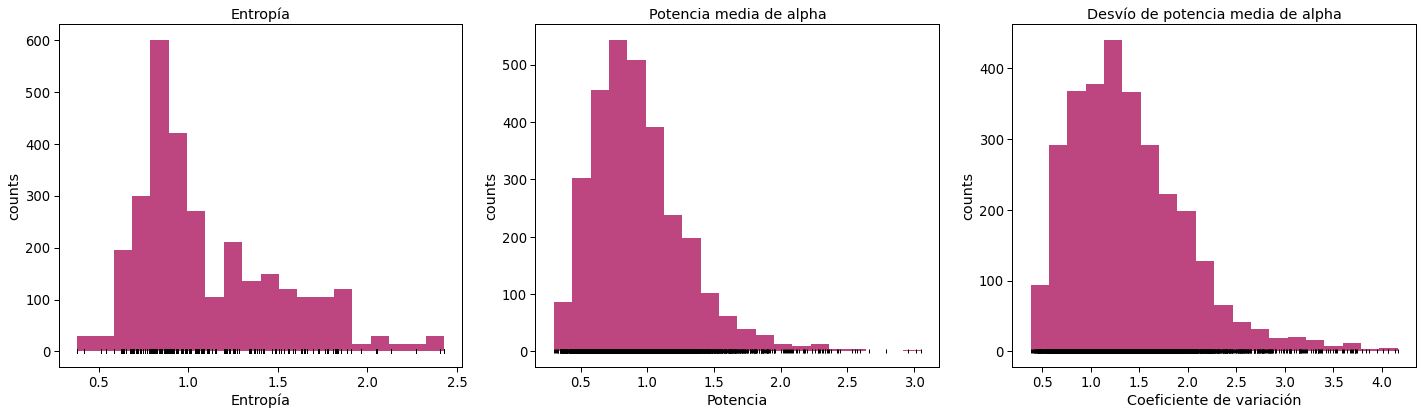

In [389]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6)) 

axs[0].hist(x=data.Entropy, bins=20, color='#ad1760', alpha=0.8)
axs[0].plot(data.Entropy, np.full_like(data.Entropy, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Entropía')
axs[0].set_xlabel('Entropía')
axs[0].set_ylabel('counts')

axs[1].hist(x=data.Mean_alpha, bins=20, color='#ad1760', alpha=0.8)
axs[1].plot(data.Mean_alpha, np.full_like(data.Mean_alpha, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Potencia media de alpha')
axs[1].set_xlabel('Potencia')
axs[1].set_ylabel('counts')

axs[2].hist(x=data.Std_alpha, bins=20, color='#ad1760', alpha=0.8)
axs[2].plot(data.Std_alpha, np.full_like(data.Std_alpha, -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Desvío de potencia media de alpha')
axs[2].set_xlabel('Coeficiente de variación')
axs[2].set_ylabel('counts')

plt.tight_layout()

print(f'Entropía:', stats.shapiro(data.Entropy))
print(f'Potencia media:', stats.shapiro(data.Mean_alpha))
print(f'Desvío:', stats.shapiro(data.Std_alpha))

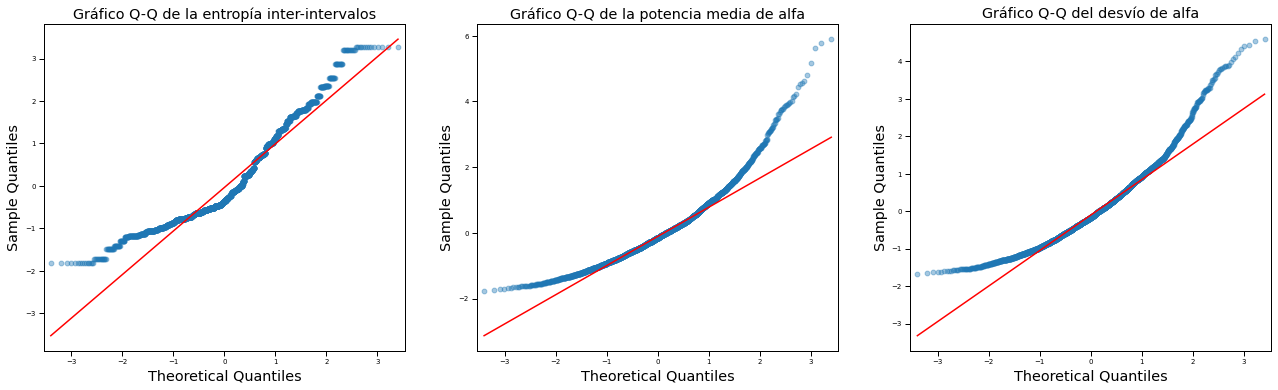

In [390]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(22, 6))

sm.qqplot(
            data.Entropy,
            fit   = True,
            line  = 'q',
            alpha = 0.4,
            lw    = 2,
            ax = ax[0])

ax[0].set_title('Gráfico Q-Q de la entropía inter-intervalos')
ax[0].tick_params(labelsize = 7)

sm.qqplot(
            data.Mean_alpha,
            fit   = True,
            line  = 'q',
            alpha = 0.4,
            lw    = 2,
            ax = ax[1])

ax[1].set_title('Gráfico Q-Q de la potencia media de alfa')
ax[1].tick_params(labelsize = 7)

sm.qqplot(
            data.Std_alpha,
            fit   = True,
            line  = 'q',
            alpha = 0.4,
            lw    = 2,
            ax = ax[2])

ax[2].set_title('Gráfico Q-Q del desvío de alfa')
ax[2].tick_params(labelsize = 7)

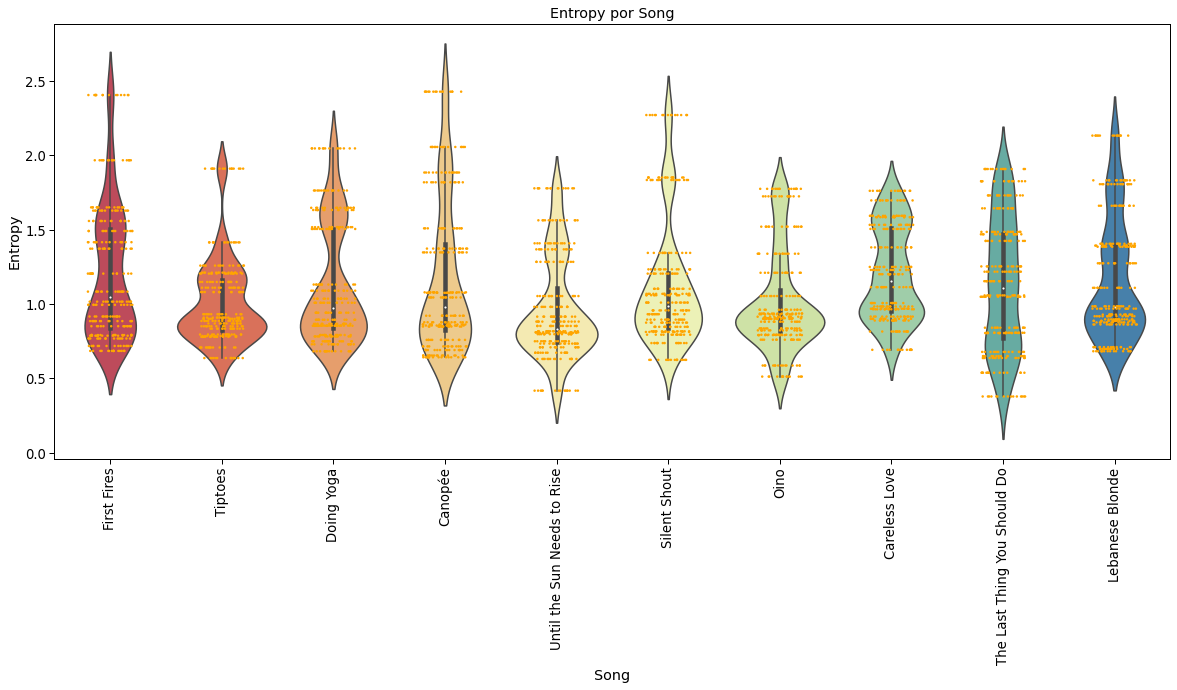

In [391]:
violinplot('Song', 'Entropy')

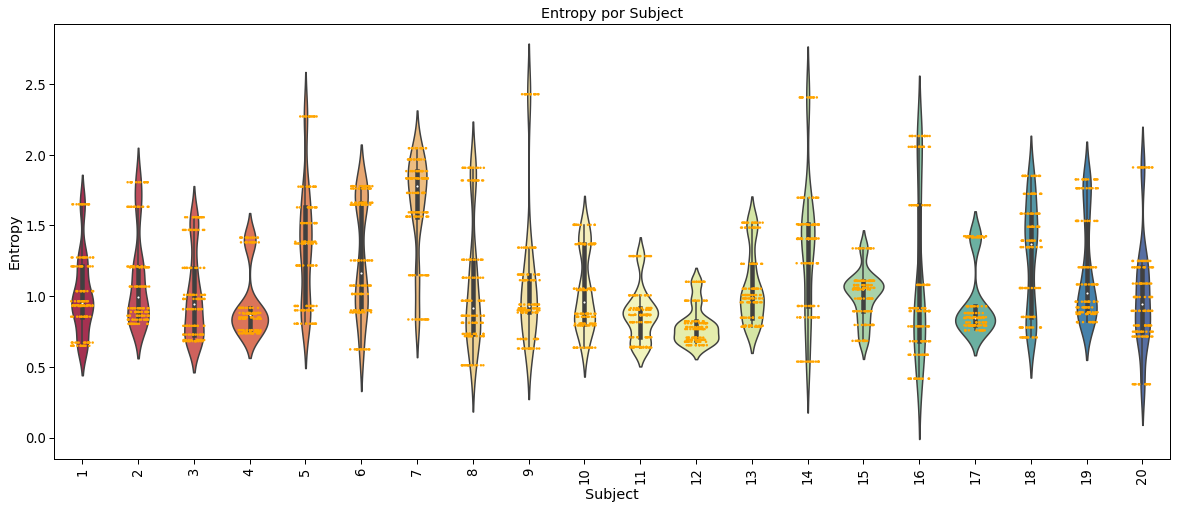

In [392]:
violinplot('Subject', 'Entropy')

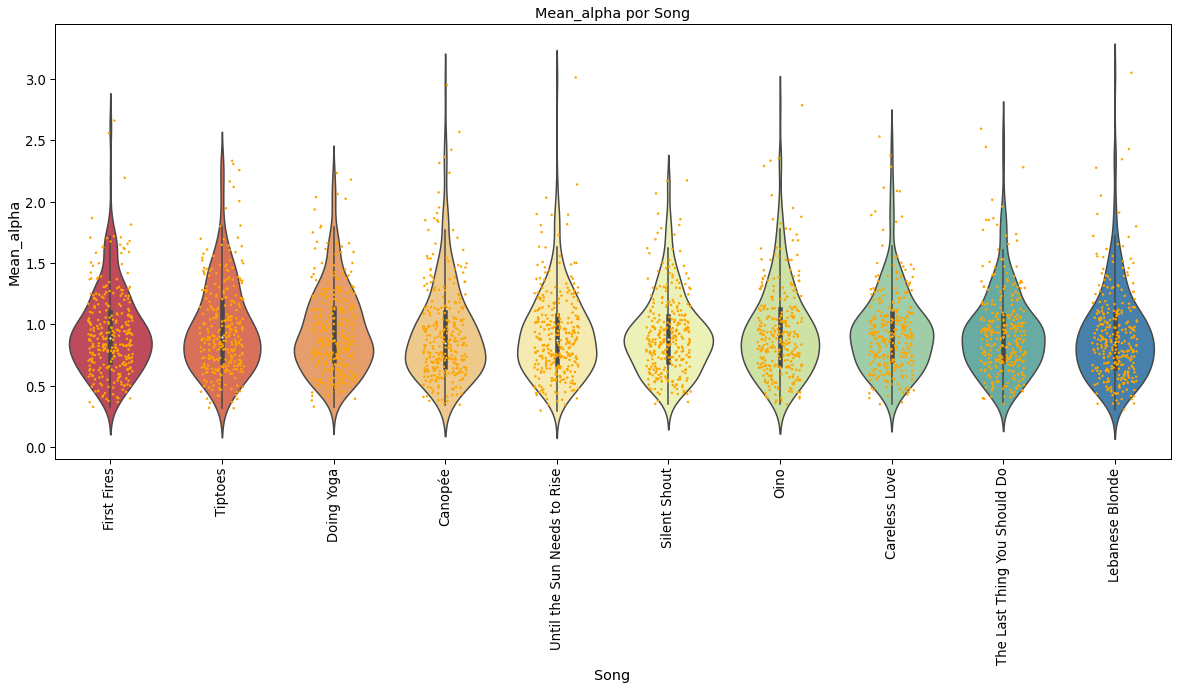

In [393]:
violinplot('Song', 'Mean_alpha')

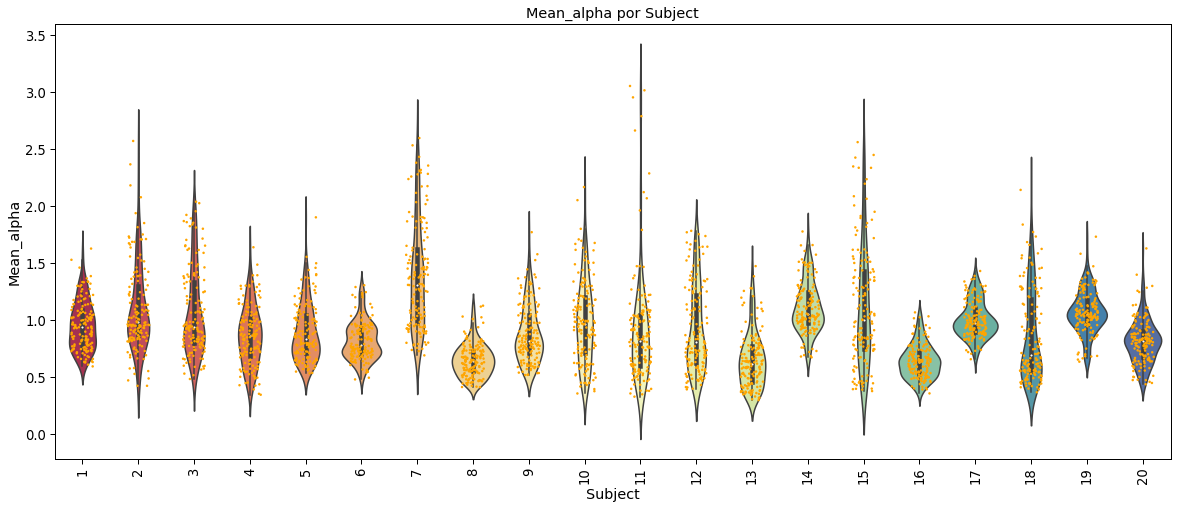

In [394]:
violinplot('Subject', 'Mean_alpha')

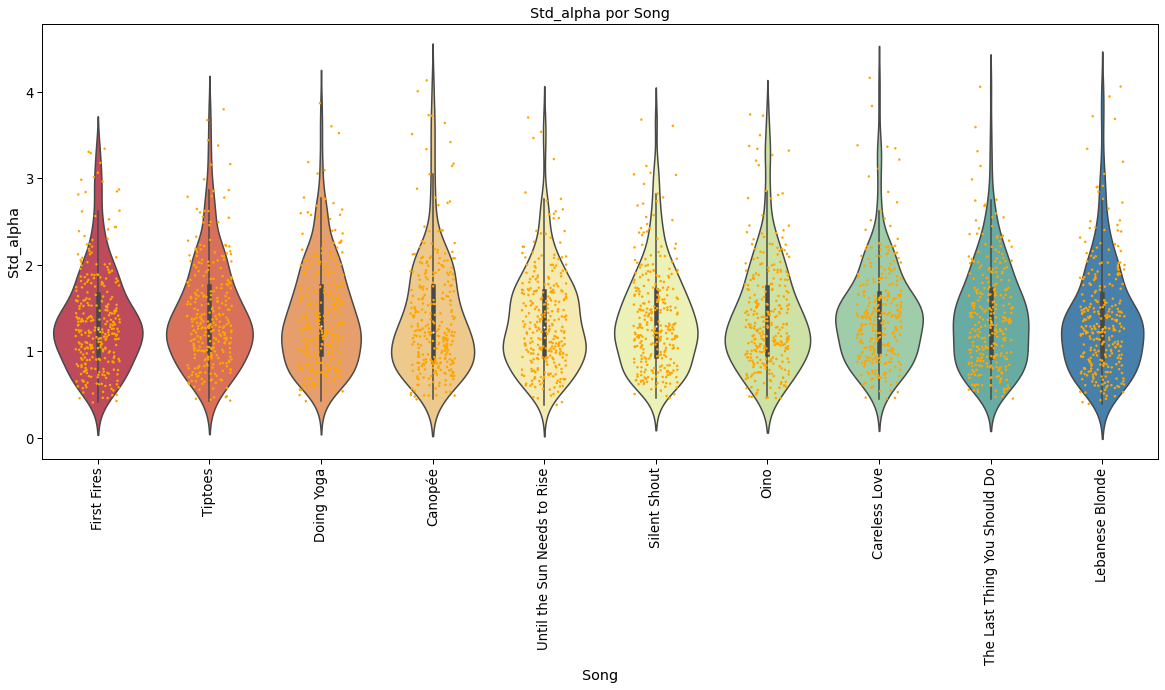

In [395]:
violinplot('Song', 'Std_alpha')

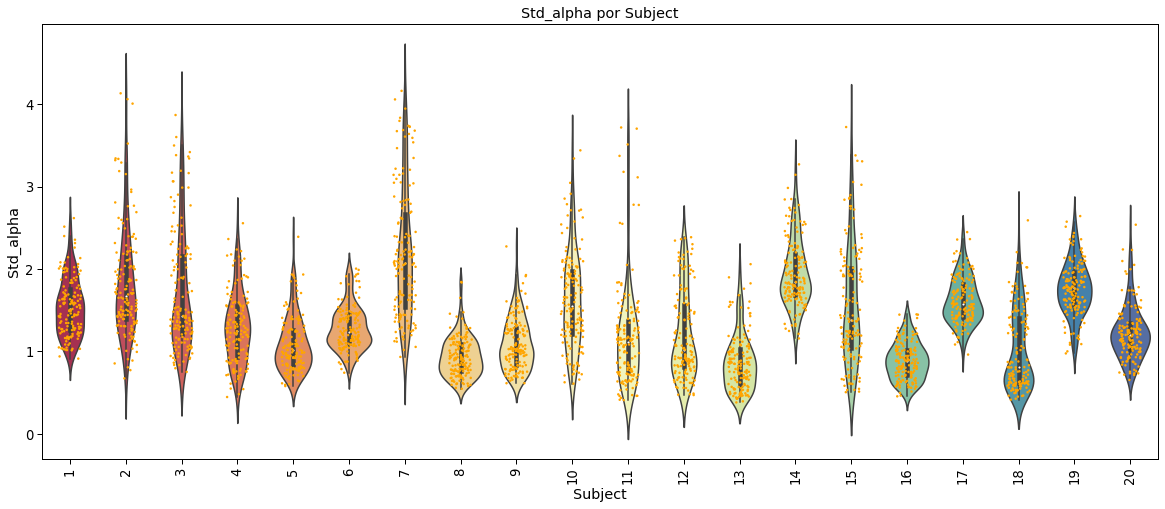

In [396]:
violinplot('Subject', 'Std_alpha')

Enjoyment: ShapiroResult(statistic=0.9573681950569153, pvalue=8.508754281331055e-29)
Familiarity: ShapiroResult(statistic=0.29661357402801514, pvalue=0.0)
Training: ShapiroResult(statistic=0.8584645390510559, pvalue=1.401298464324817e-45)


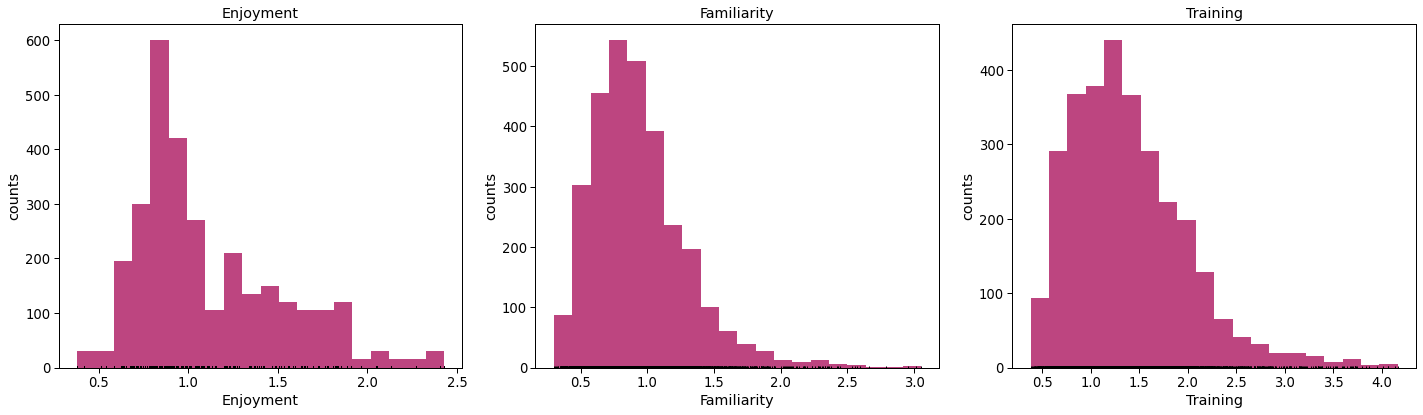

In [397]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6)) 

axs[0].hist(x=data.Entropy, bins=20, color='#ad1760', alpha=0.8)
axs[0].plot(data.Entropy, np.full_like(data.Enjoyment, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Enjoyment')
axs[0].set_xlabel('Enjoyment')
axs[0].set_ylabel('counts')

axs[1].hist(x=data.Mean_alpha, bins=20, color='#ad1760', alpha=0.8)
axs[1].plot(data.Mean_alpha, np.full_like(data.Familiarity, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Familiarity')
axs[1].set_xlabel('Familiarity')
axs[1].set_ylabel('counts')

axs[2].hist(x=data.Std_alpha, bins=20, color='#ad1760', alpha=0.8)
axs[2].plot(data.Std_alpha, np.full_like(data.Training, -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Training')
axs[2].set_xlabel('Training')
axs[2].set_ylabel('counts')

plt.tight_layout();

print(f'Enjoyment:', stats.shapiro(data.Enjoyment))
print(f'Familiarity:', stats.shapiro(data.Familiarity))
print(f'Training:', stats.shapiro(data.Training))

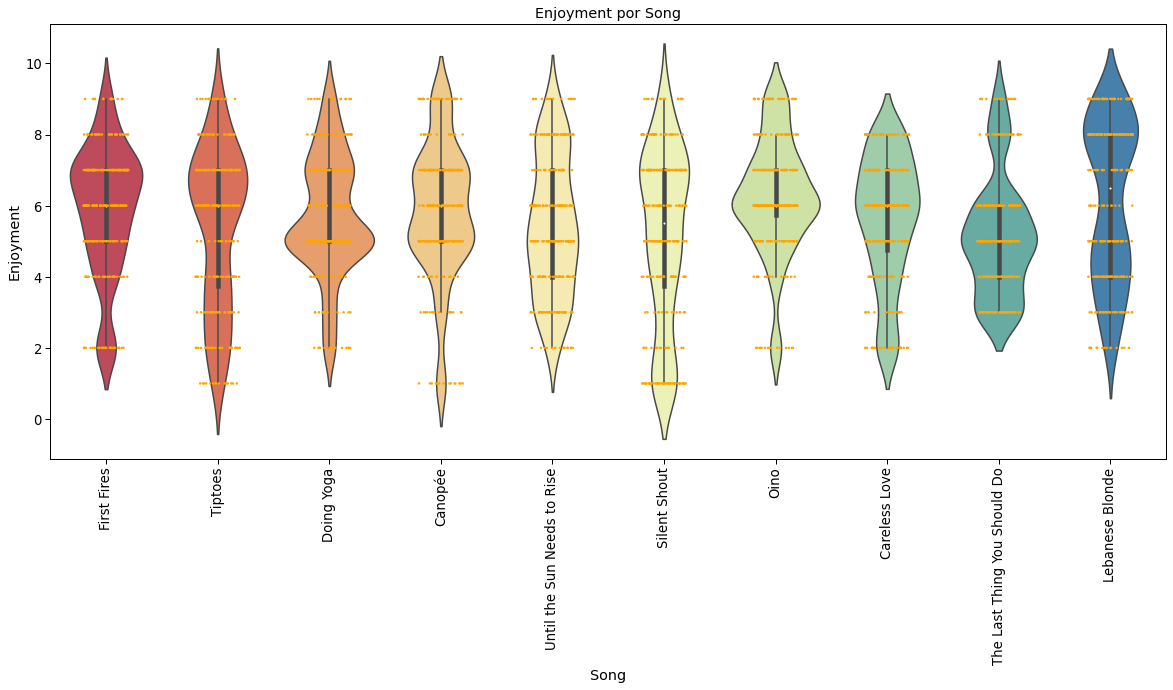

In [398]:
violinplot('Song', 'Enjoyment')

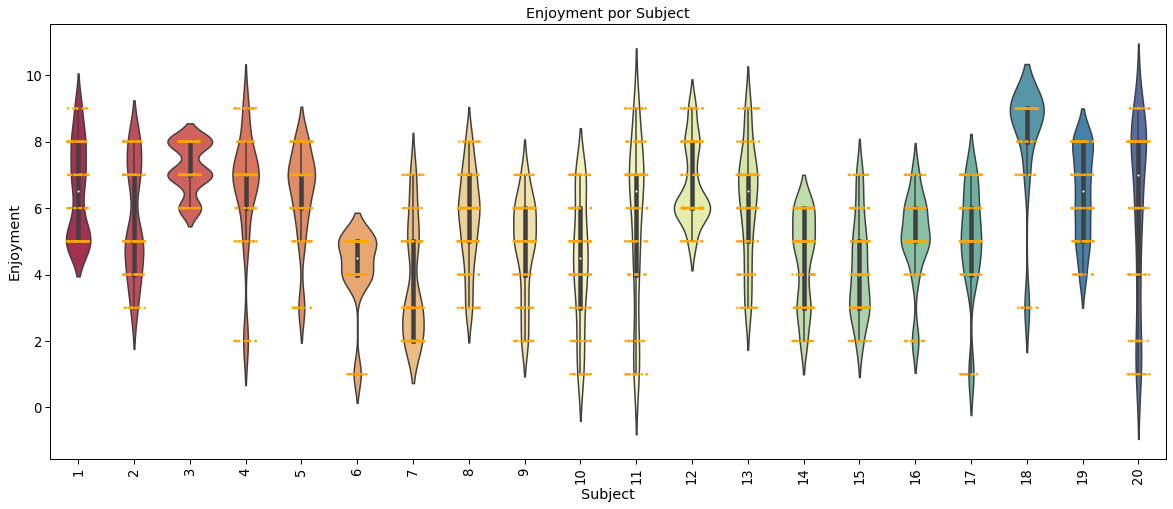

In [399]:
violinplot('Subject', 'Enjoyment')

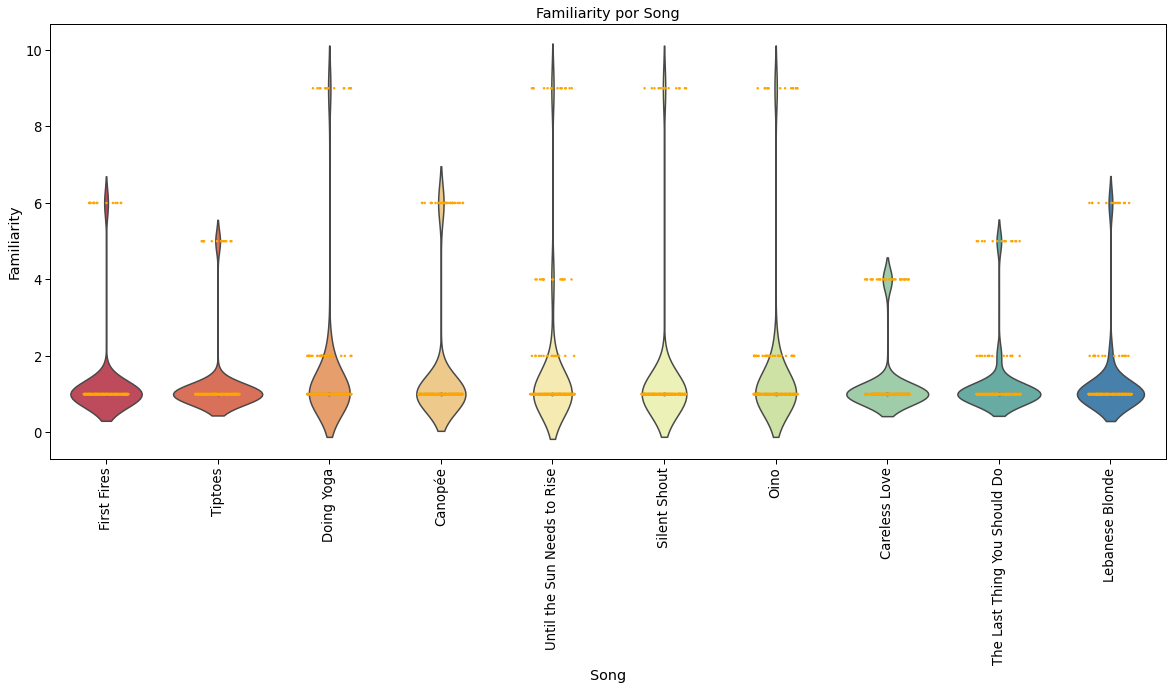

In [400]:
violinplot('Song', 'Familiarity')

Queda más que claro que no tengo nada distribuido normalmente así que voy a tener que usar Spearman.

### Análisis global de asociación entre variables de EEG y tapping

Lo primero que quiero probar es si hay correlaciones significativas entre las variables sin estratificar por ninguna otra variable como sujeto, canción, etc.

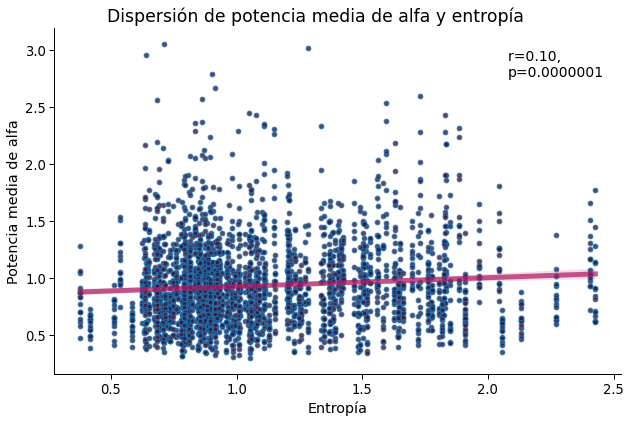

In [401]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha', 
               data = data, 
               height = 6,
               aspect = 1.5,
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.7f}'.format(r, p),
            transform=ax.transAxes, fontsize=14)
    

g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Dispersión de potencia media de alfa y entropía')
g.ax.set_xlabel('Entropía')
g.ax.set_ylabel('Potencia media de alfa')
g.savefig('Media de potencia y entropia.png');
plt.show();

Obviamente, para cada valor de entropía tengo muchos de potencia media de alfa, va a pasar lo mismo con el desvío. 

Voy a crear una variable con la potencia media para cada sujeto y cada canción y otra igual para el desvío, así tengo la misma cantidad de puntos para entropía y para los scores de potencia media y desvío.

In [456]:
data[['Mean_alpha_by_song_sub', 'Mean_std_alpha_by_song_sub']] = data.groupby(['Subject', 'Song'])[['Mean_alpha', 'Std_alpha']].transform('mean')

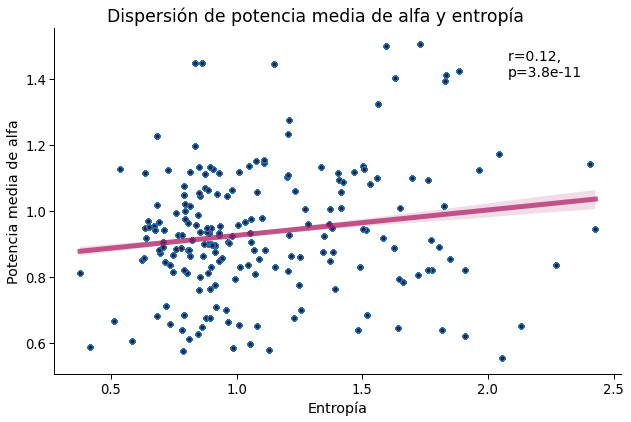

In [468]:
g = sns.lmplot(x = 'Entropy', 
               y = 'Mean_alpha_by_song_sub', 
               data = data, 
               height = 6,
               aspect = 1.5,
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_song_sub'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.2g}'.format(r, p),
            transform=ax.transAxes, fontsize=14)
    

g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Dispersión de potencia media de alfa y entropía')
g.ax.set_xlabel('Entropía')
g.ax.set_ylabel('Potencia media de alfa')
g.savefig('Media de potencia y entropia.png');
plt.show();

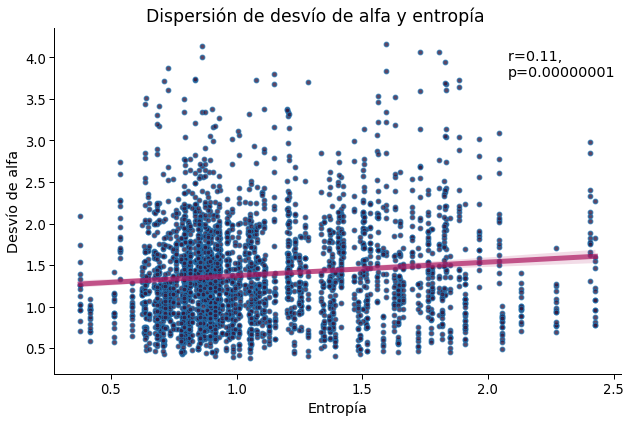

In [402]:
g = sns.lmplot(x ='Entropy', 
               y ='Std_alpha', 
               data = data, 
               height = 6,
               aspect = 1.5,
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Std_alpha'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Dispersión de desvío de alfa y entropía')
g.ax.set_xlabel('Entropía')
g.ax.set_ylabel('Desvío de alfa')
g.savefig('Desvío de potencia y entropia.png');
plt.show();

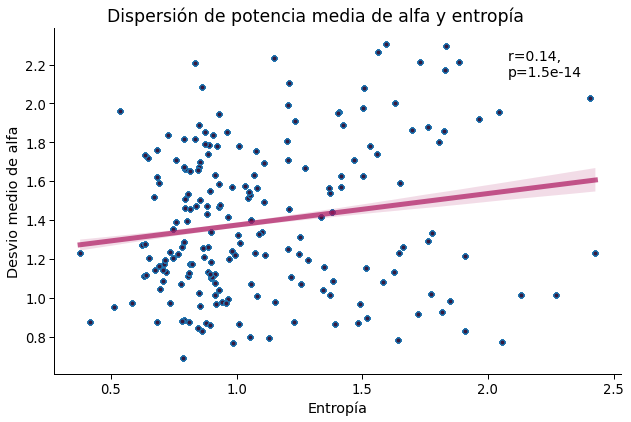

In [470]:
g = sns.lmplot(x = 'Entropy', 
               y = 'Mean_std_alpha_by_song_sub', 
               data = data, 
               height = 6,
               aspect = 1.5,
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_std_alpha_by_song_sub'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.2g}'.format(r, p),
            transform=ax.transAxes, fontsize=14)
    

g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Dispersión de potencia media de alfa y entropía')
g.ax.set_xlabel('Entropía')
g.ax.set_ylabel('Desvio medio de alfa')
g.savefig('Desvío de potencia y entropia.png');
plt.show();

No dan mucho mejor, pero se ven más coherentes.

Lo que se ve es que claramente, las medidas de la media de potencia y el desvío tienen algún tipo de asociación ya a nivel global, que aunque débil es significativa. 
<br>
A su vez, la medida de % de tiempo por encima de 2 desvíos no está asociada a este nivel.


## Análisis estratificado


Ahora quiero ver qué pasa si en lugar de asociar variables globalmente, lo voy a haciendo agrupando en función de otras variables que pueden estar interviniendo.

En principio, empiezo por ROI.

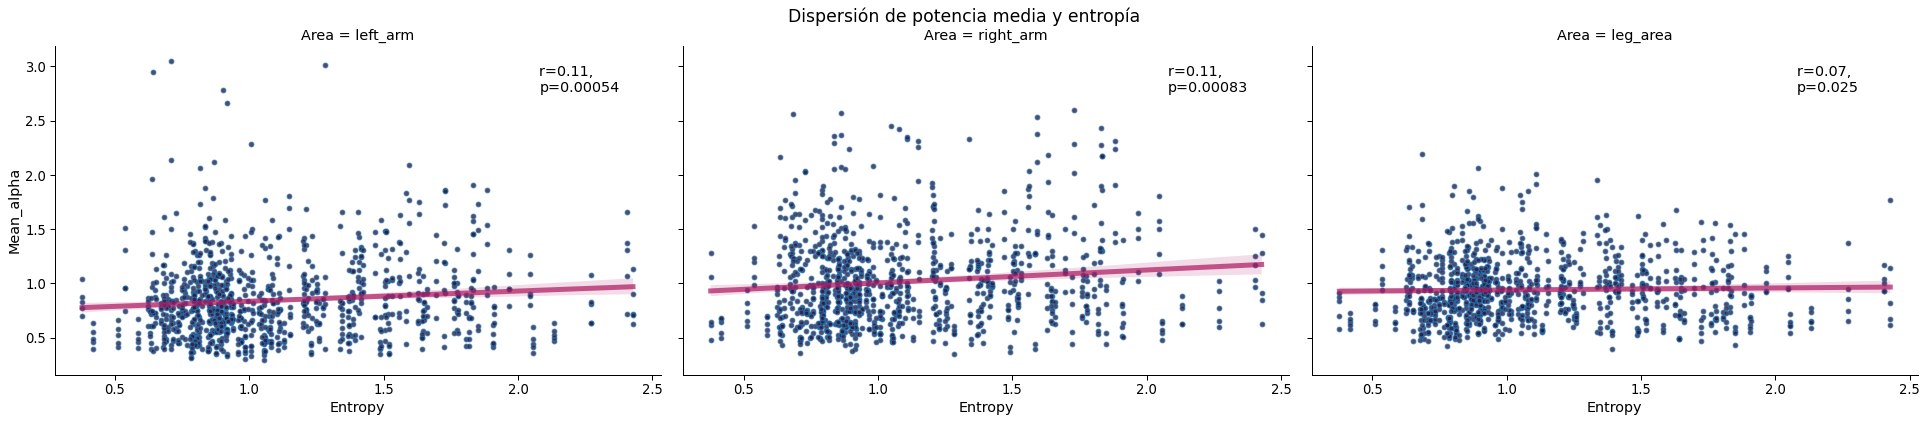

In [489]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha', 
               data = data,
               height = 6,
               aspect = 1.5,
               #row = 'Song',
               col = 'Area',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('Dispersión de potencia media y entropía')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

De nuevo, para los análisis que haga estratificando por ROI, voy a crear una variable de potencia media y desvío para cada ROI de cada sujeto en cada canción para tener la misma cantidad de puntos.

In [482]:
data[['Mean_alpha_by_area', 'Mean_std_alpha_by_area']] = data.groupby(['Subject', 'Song', 'Area'])[['Mean_alpha', 'Std_alpha']].transform('mean')

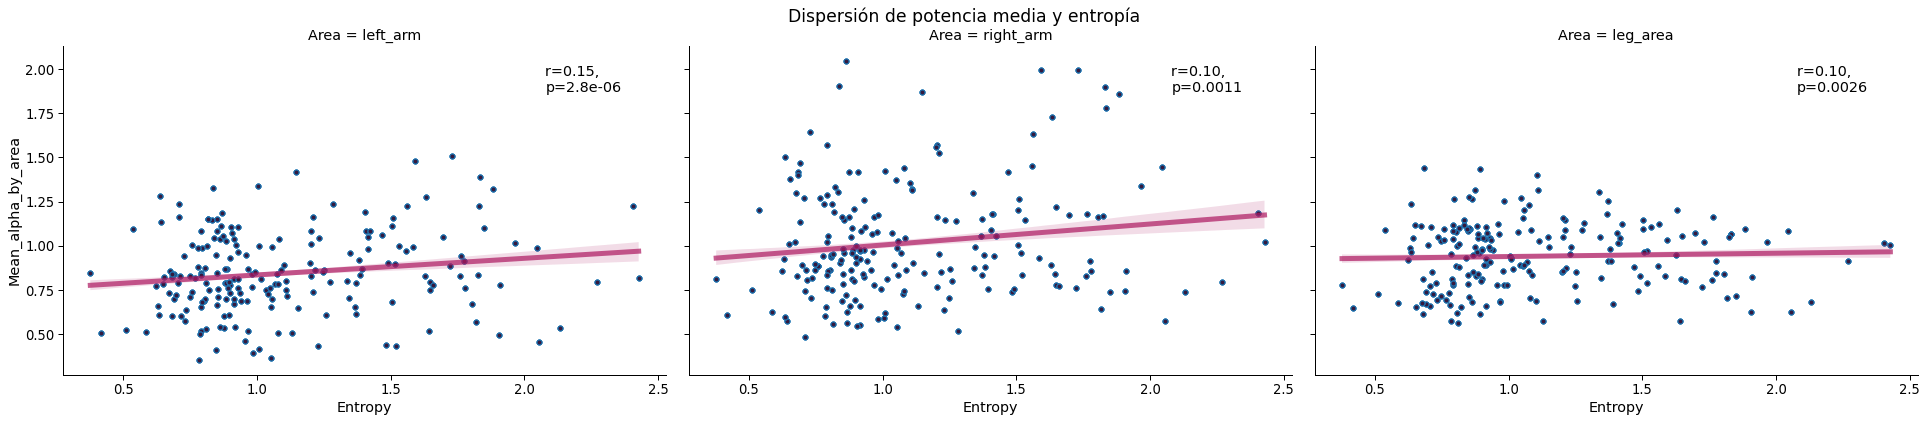

In [499]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_area', 
               data = data,
               height = 6,
               aspect = 1.5,
               #row = 'Song',
               col = 'Area',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_area'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('Dispersión de potencia media y entropía')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

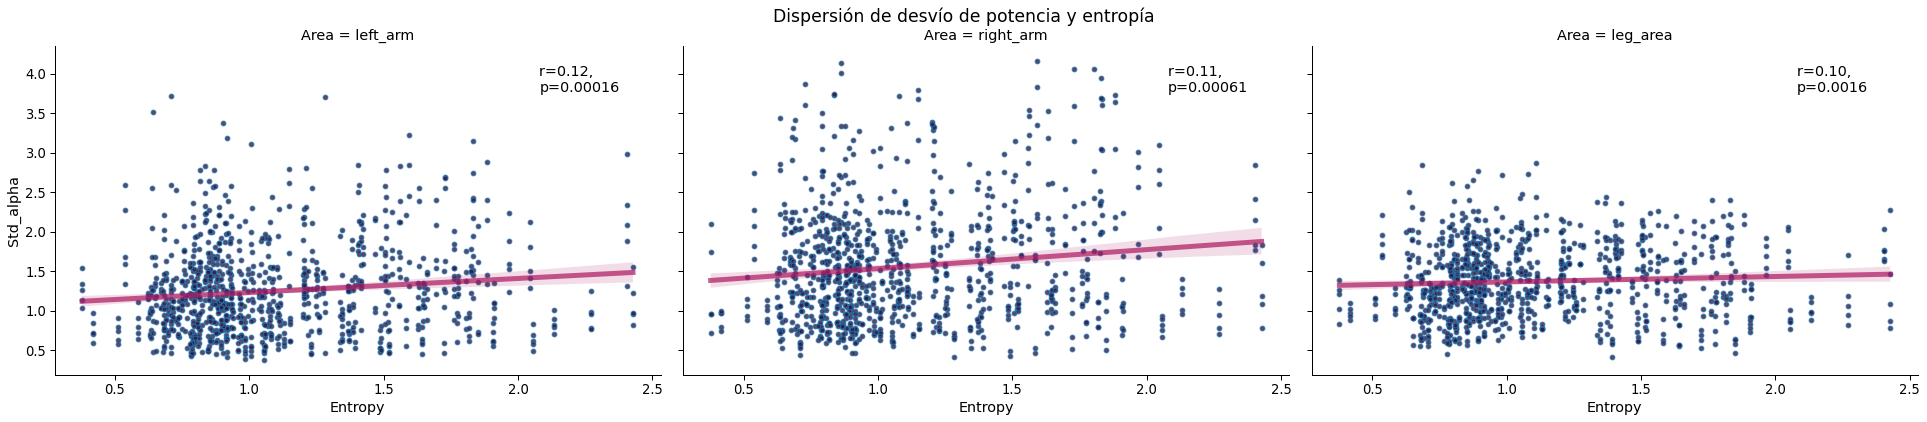

In [500]:
g = sns.lmplot(x ='Entropy', 
               y ='Std_alpha', 
               data = data,
               height = 6,
               aspect = 1.5,
               #row = 'Song',
               col = 'Area',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Std_alpha'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('Dispersión de desvío de potencia y entropía')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

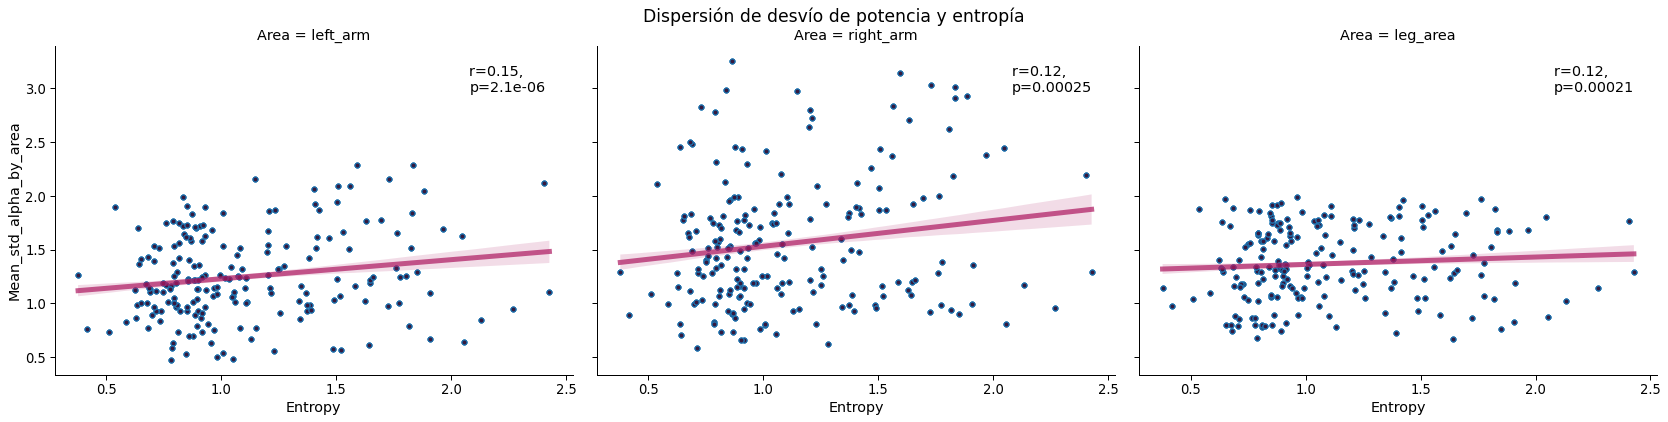

In [493]:
g = sns.lmplot(x = 'Entropy', 
               y = 'Mean_std_alpha_by_area', 
               data = data,
               height = 6,
               aspect = 1.3,
               #row = 'Song',
               col = 'Area',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_std_alpha_by_area'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('Dispersión de desvío de potencia y entropía')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

Ahí se ven más limpias las relaciones, siguen siendo bastante marginales pero significativas.

Acá pruebo estratificando por canción.

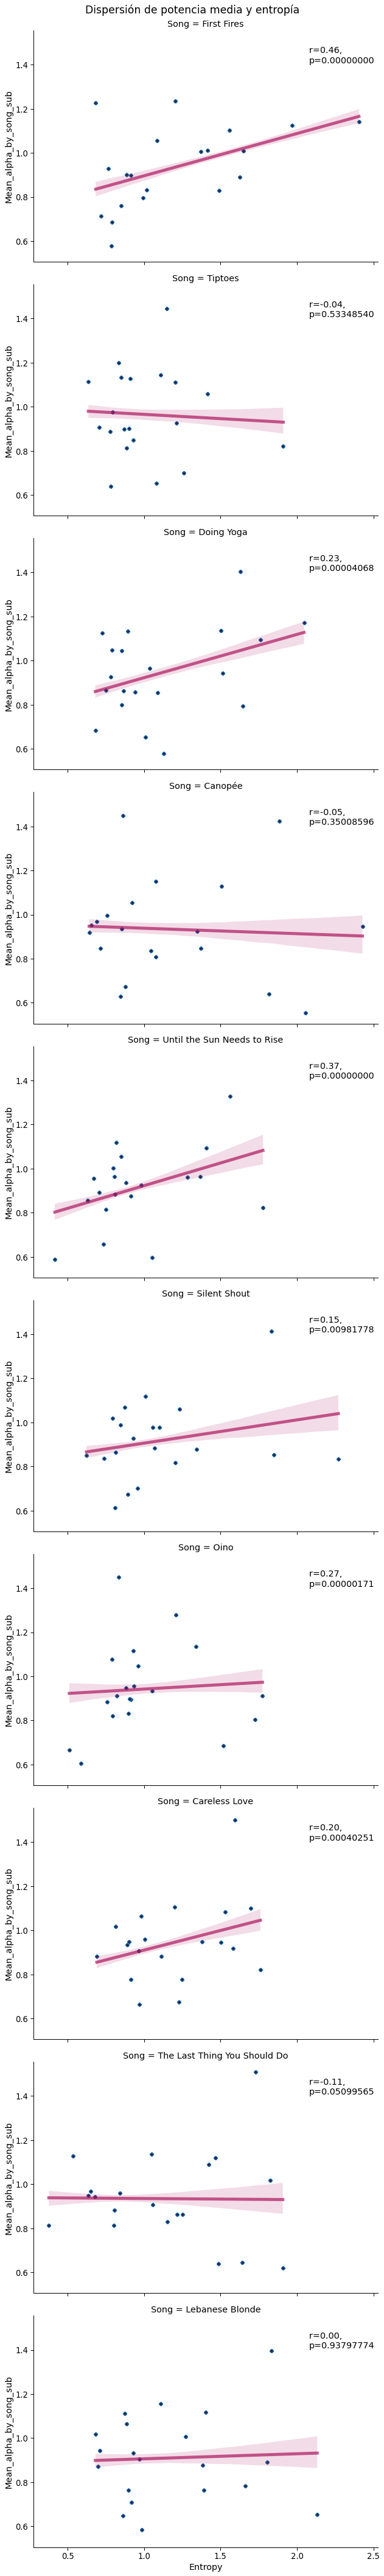

In [496]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_song_sub', 
               data = data,
               height = 6,
               aspect = 1.5,
               row = 'Song',
               #col = 'Area',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_song_sub'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.97)
g.fig.suptitle('Dispersión de potencia media y entropía')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

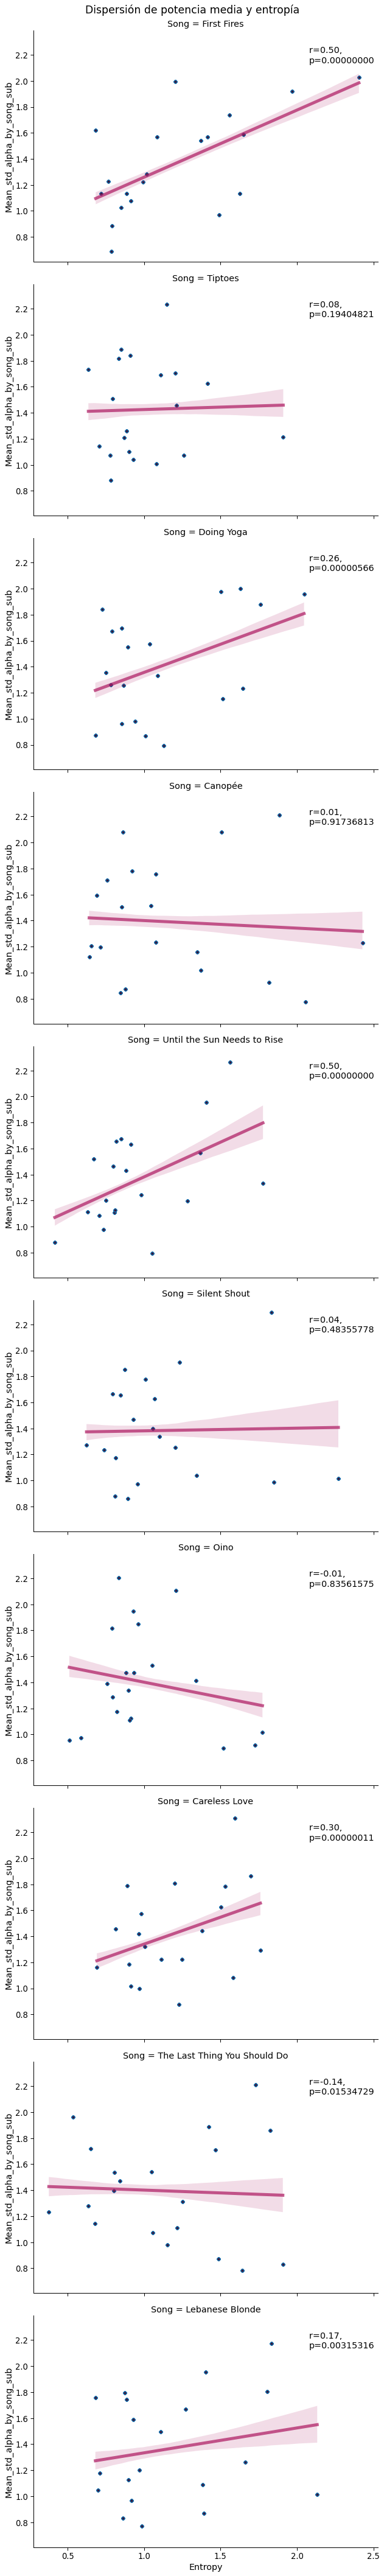

In [498]:
g = sns.lmplot(x = 'Entropy', 
               y = 'Mean_std_alpha_by_song_sub', 
               data = data,
               height = 6,
               aspect = 1.5,
               row = 'Song',
               #col = 'Area',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_std_alpha_by_song_sub'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.97)
g.fig.suptitle('Dispersión de potencia media y entropía')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

Estratificado por canción tengo 6 correlaciones significativas para la media de potencia y 5 para el desvío, ya todas entre chicas y moderadas.

Voy a agregar las ROI a la mezcla a ver qué sale.

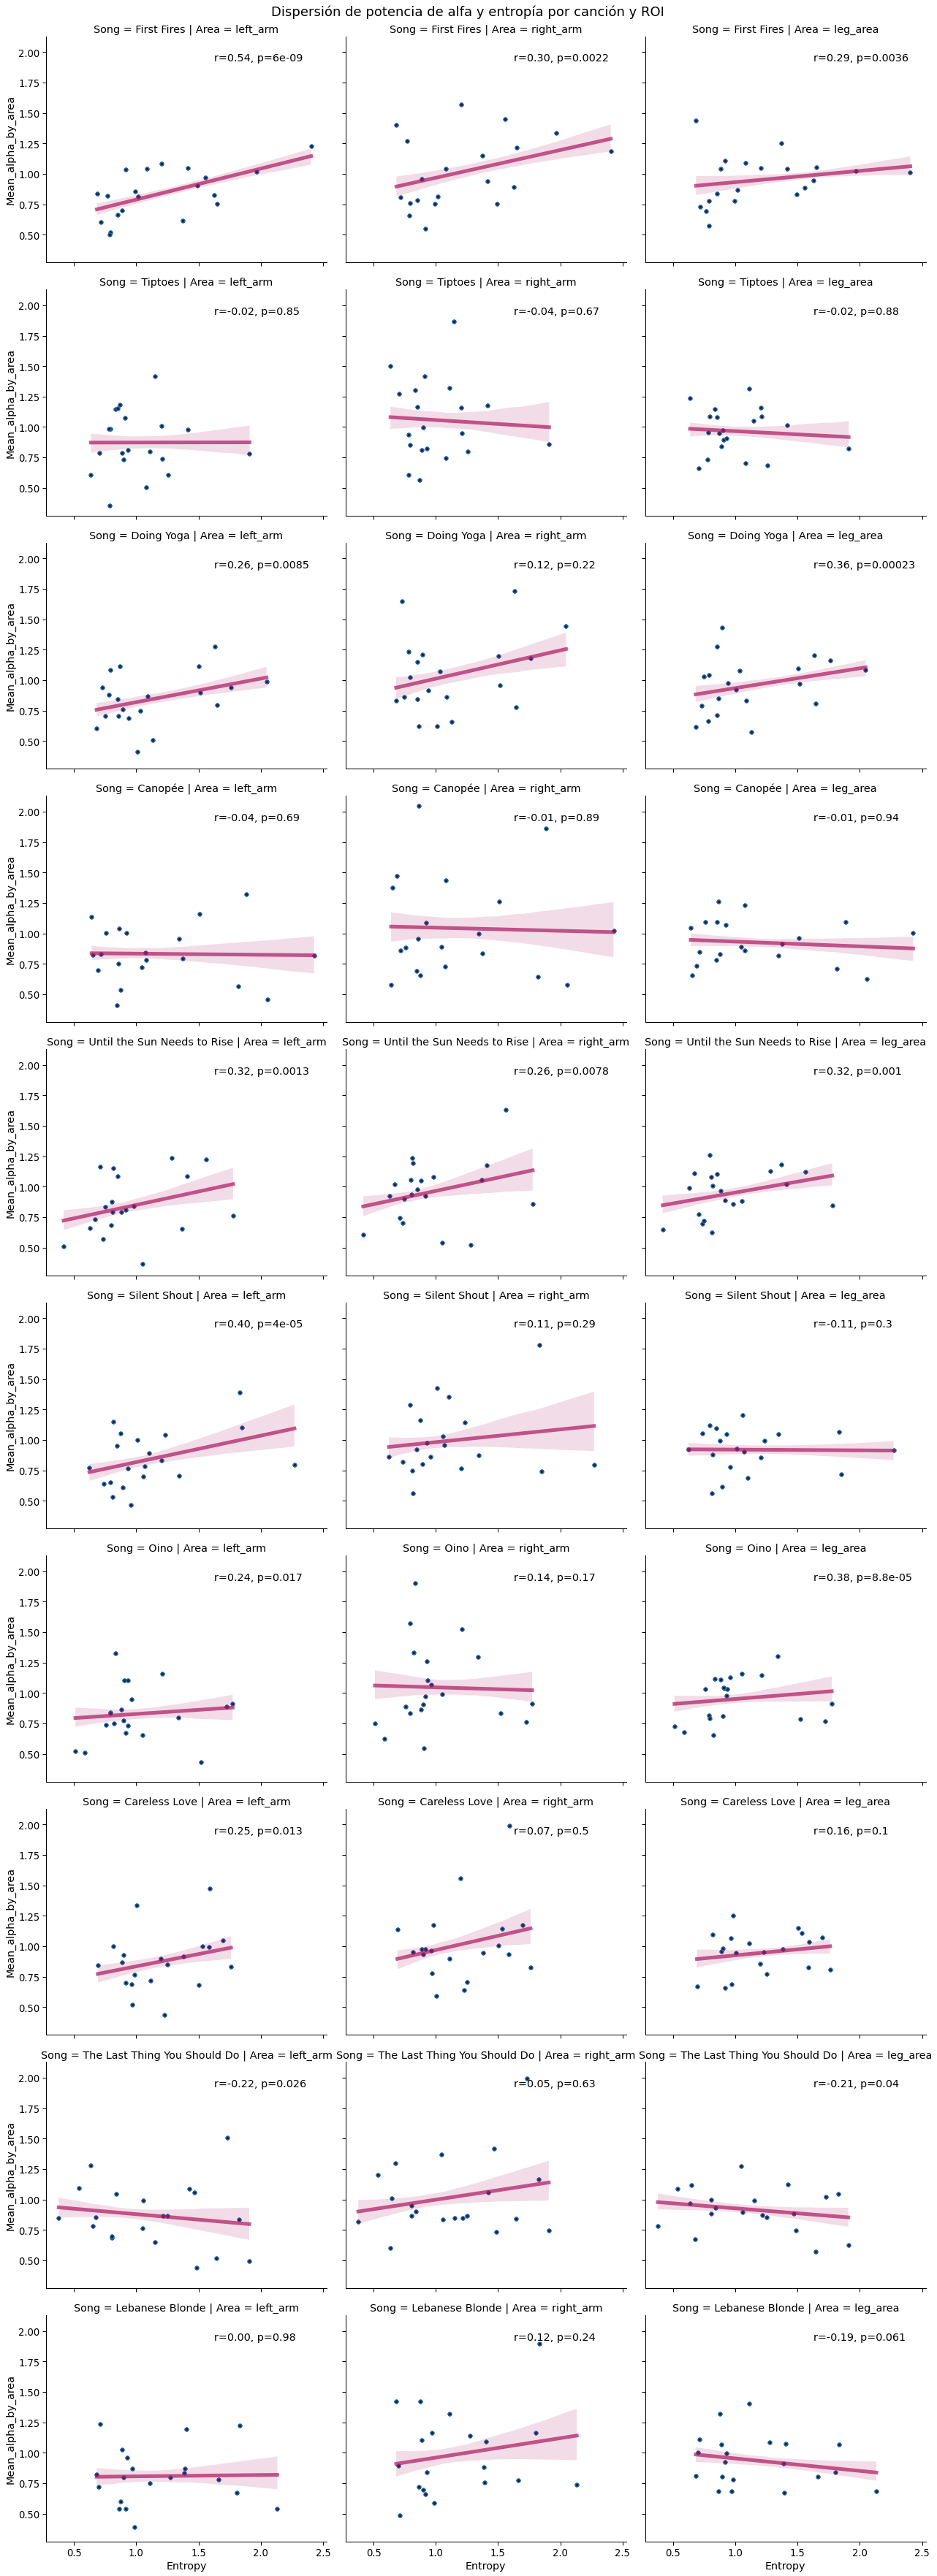

In [501]:
g = sns.lmplot(x ='Entropy', 
               y = 'Mean_alpha_by_area',
               data = data, 
               col = 'Area', 
               row = 'Song',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'},
               aspect = 1.2
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_area'])
    ax = plt.gca()
    ax.text(.6, .89, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.968)
g.fig.suptitle('Dispersión de potencia de alfa y entropía por canción y ROI', fontsize=18)
g.savefig('Potencia media por canción y entropia.png');
plt.show();

Con la media tengo 5 canciones con correlaciones significativas:

El ROI del brazo izquierdo tiene 5.

El ROi del brazo derecho tiene 2.

El ROI de la pierna tiene 4.

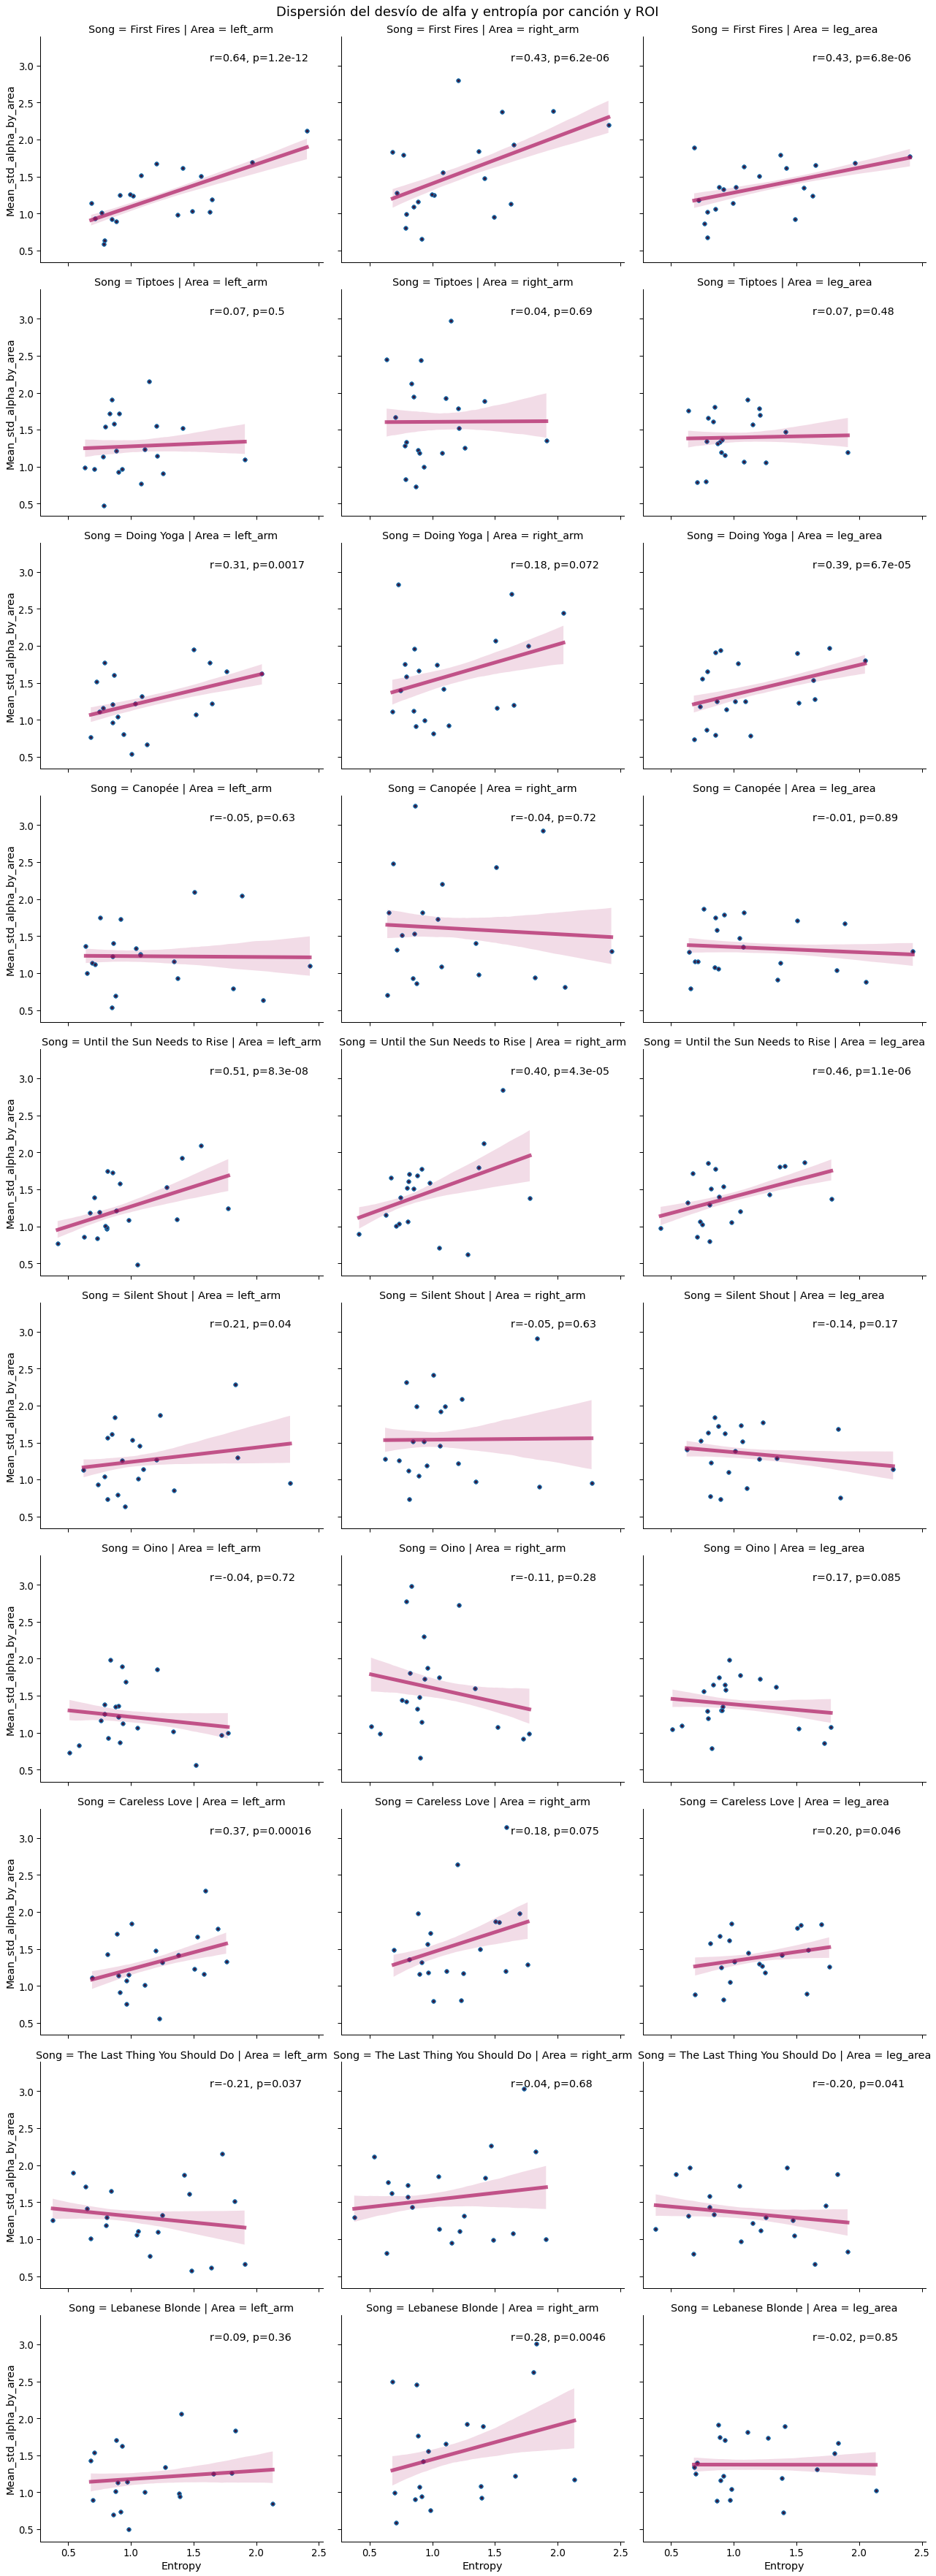

In [502]:
g = sns.lmplot(x ='Entropy', y ='Mean_std_alpha_by_area', data = data, 
               col = 'Area', 
               row = 'Song',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'},
               aspect = 1.2
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_std_alpha_by_area'])
    ax = plt.gca()
    ax.text(.6, .89, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.968)
g.fig.suptitle('Dispersión del desvío de alfa y entropía por canción y ROI', fontsize=18)
g.savefig('Potencia media por canción y entropia.png');
plt.show();

Con el desvío tengo 5 canciones con correlaciones significativas, algunas ya poniendose interesantes:

El ROI del brazo izquierdo tiene 4.

El ROi del brazo derecho tiene 3.

El ROI de la pierna tiene 3.

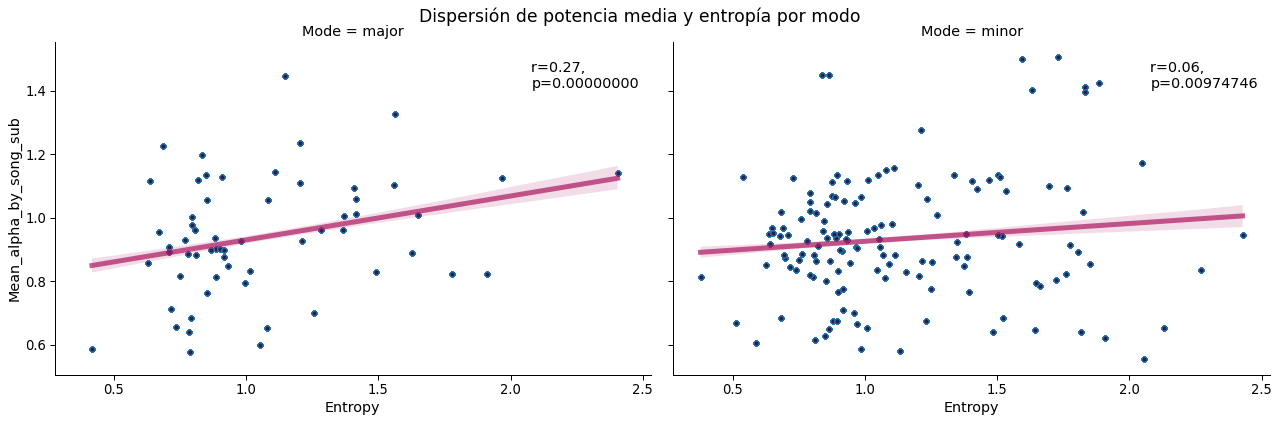

In [515]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_song_sub', 
               data = data,
               height = 6,
               aspect = 1.5,
               col = 'Mode',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_song_sub'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Dispersión de potencia media y entropía por modo')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

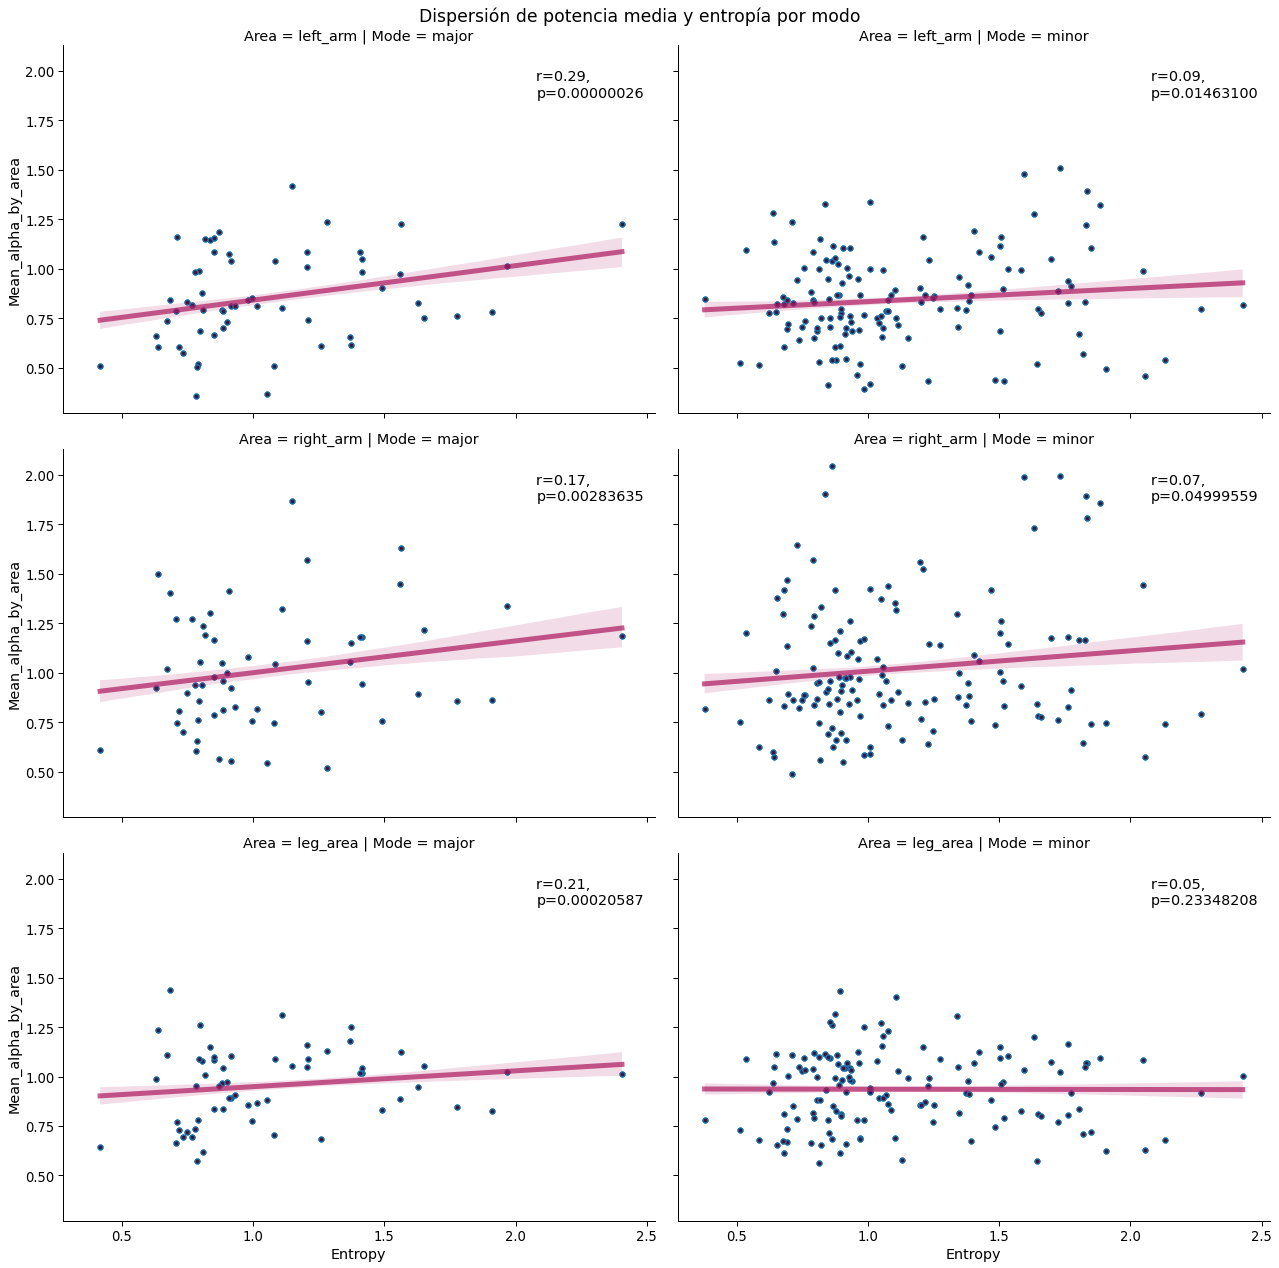

In [506]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_area', 
               data = data,
               height = 6,
               aspect = 1.5,
               row = 'Area',
               col = 'Mode',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_area'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Dispersión de potencia media y entropía por modo')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

Acá parece que hay un efecto por modo, pero si miro canción por canción, hay tres temas en tonalidad mayor, de los cuales 2 tienen una correlación positiva y 7 temas menores, de los cuales 3 tienen correlaciones significativas, así que tiene que haber algo más que este explicando esto.

Voy a explorar más de las features de Spotify, empezando por el tempo.

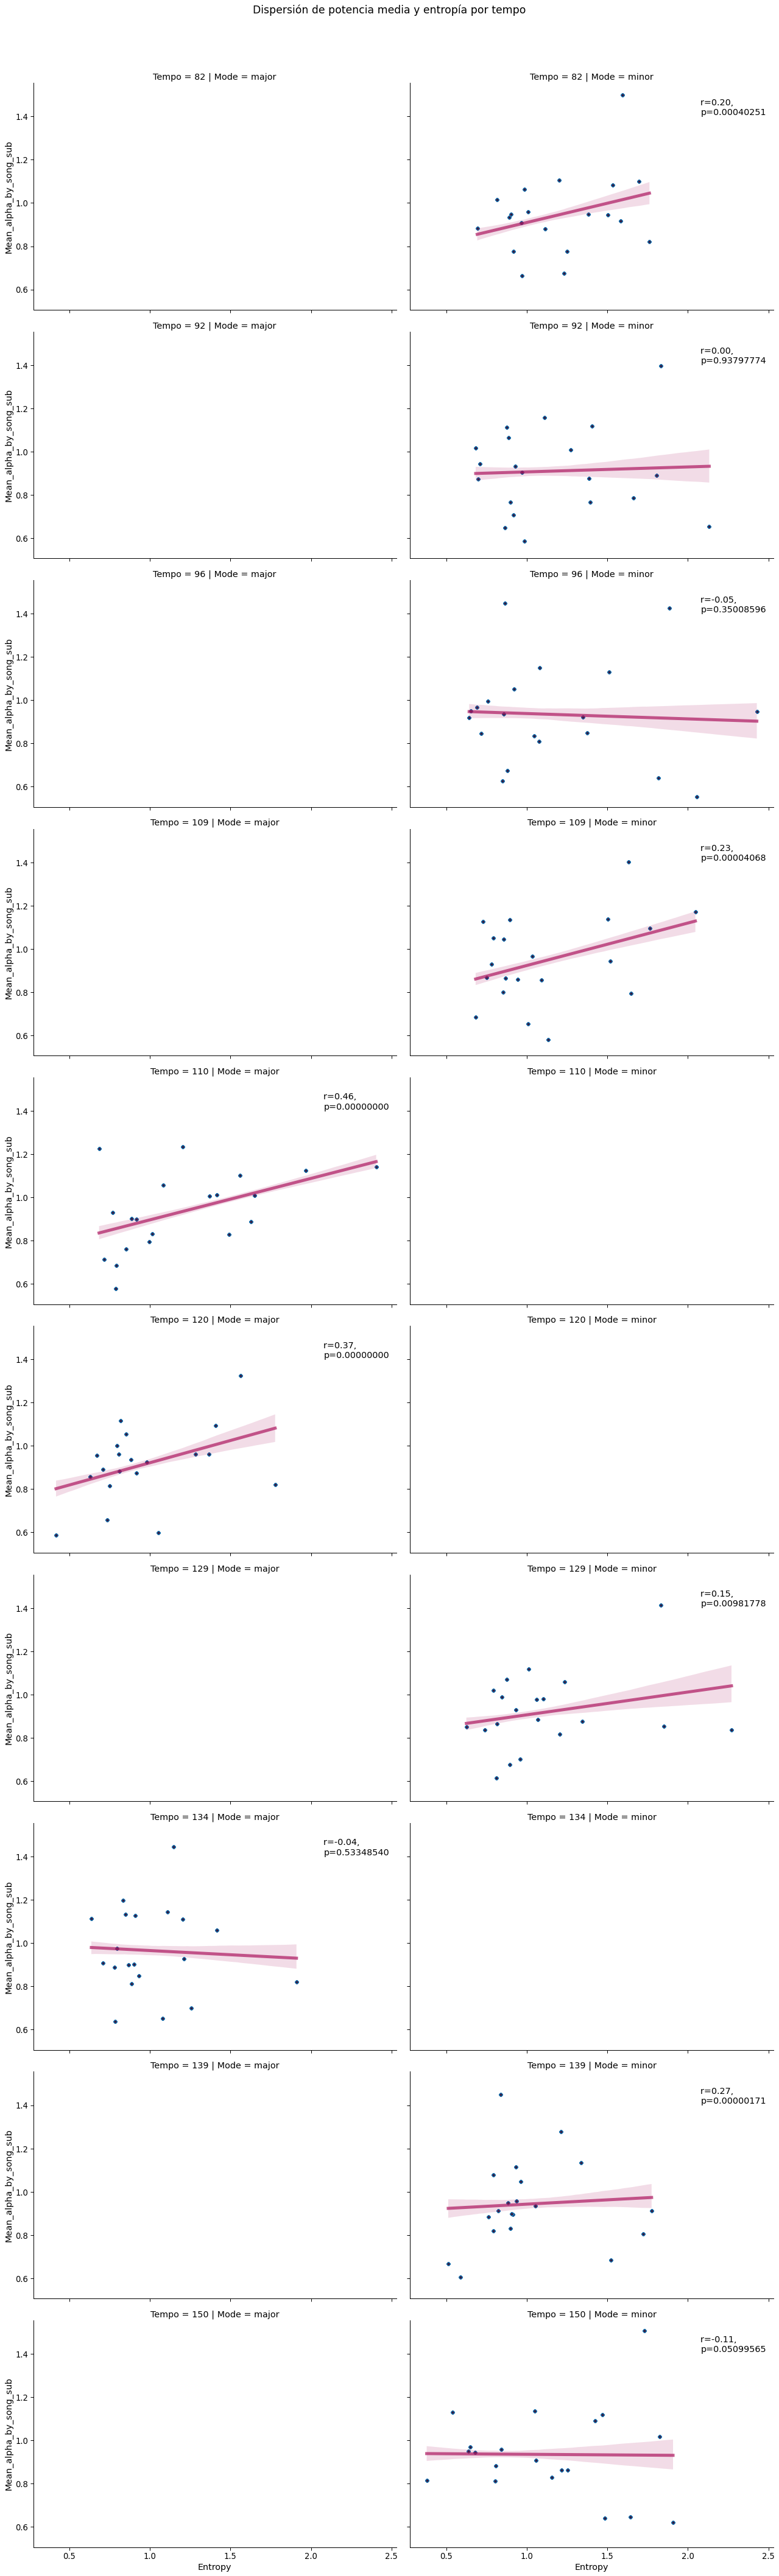

In [523]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_song_sub', 
               data = data,
               height = 6,
               aspect = 1.5,
               row = 'Tempo',
               col = 'Mode',
               #hue = 'Tempo',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_song_sub'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Dispersión de potencia media y entropía por tempo')
plt.show();

No parece haber un efecto del tempo, probamos la energía.

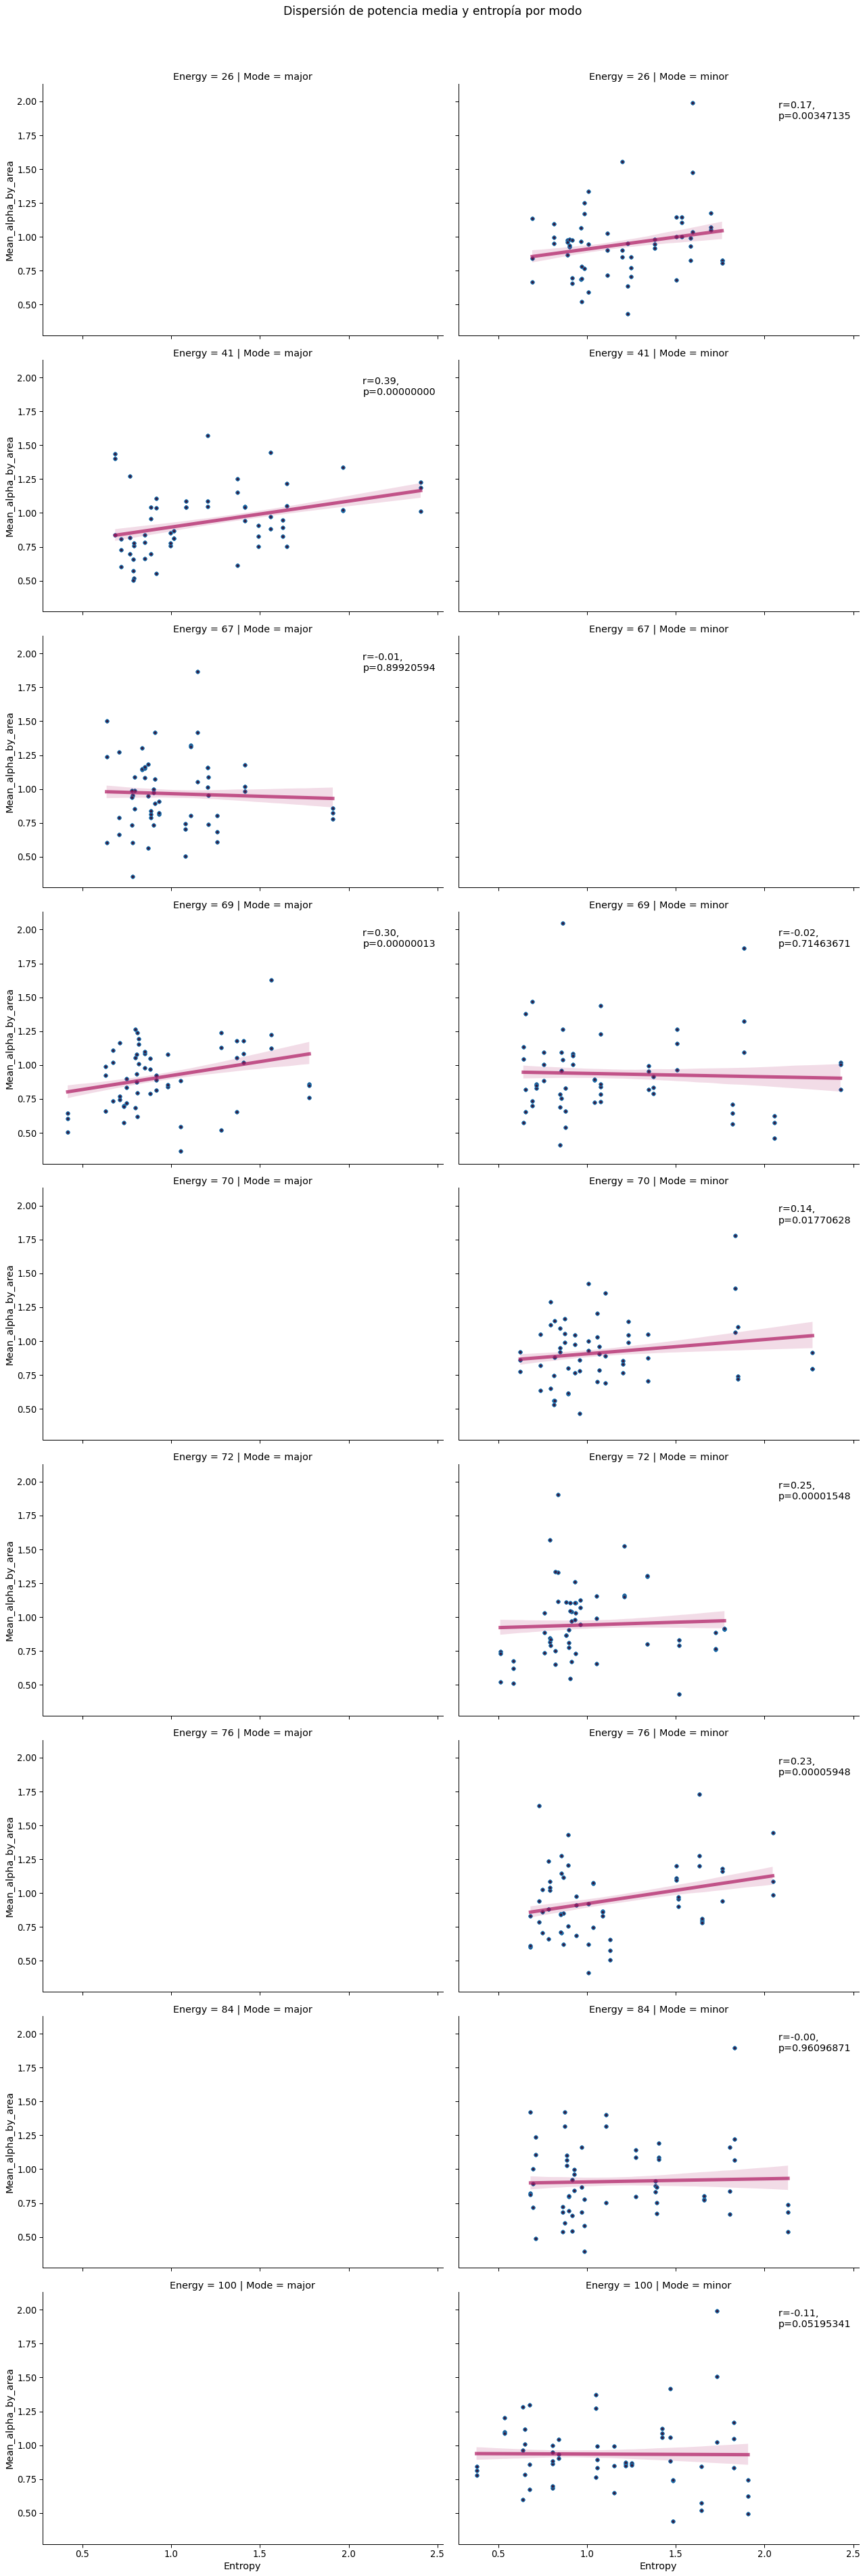

In [522]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_song_sub', 
               data = data,
               height = 6,
               aspect = 1.5,
               row = 'Energy',
               col = 'Mode',
               #hue = 'Tempo',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_song_sub'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Dispersión de potencia media y entropía por modo')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

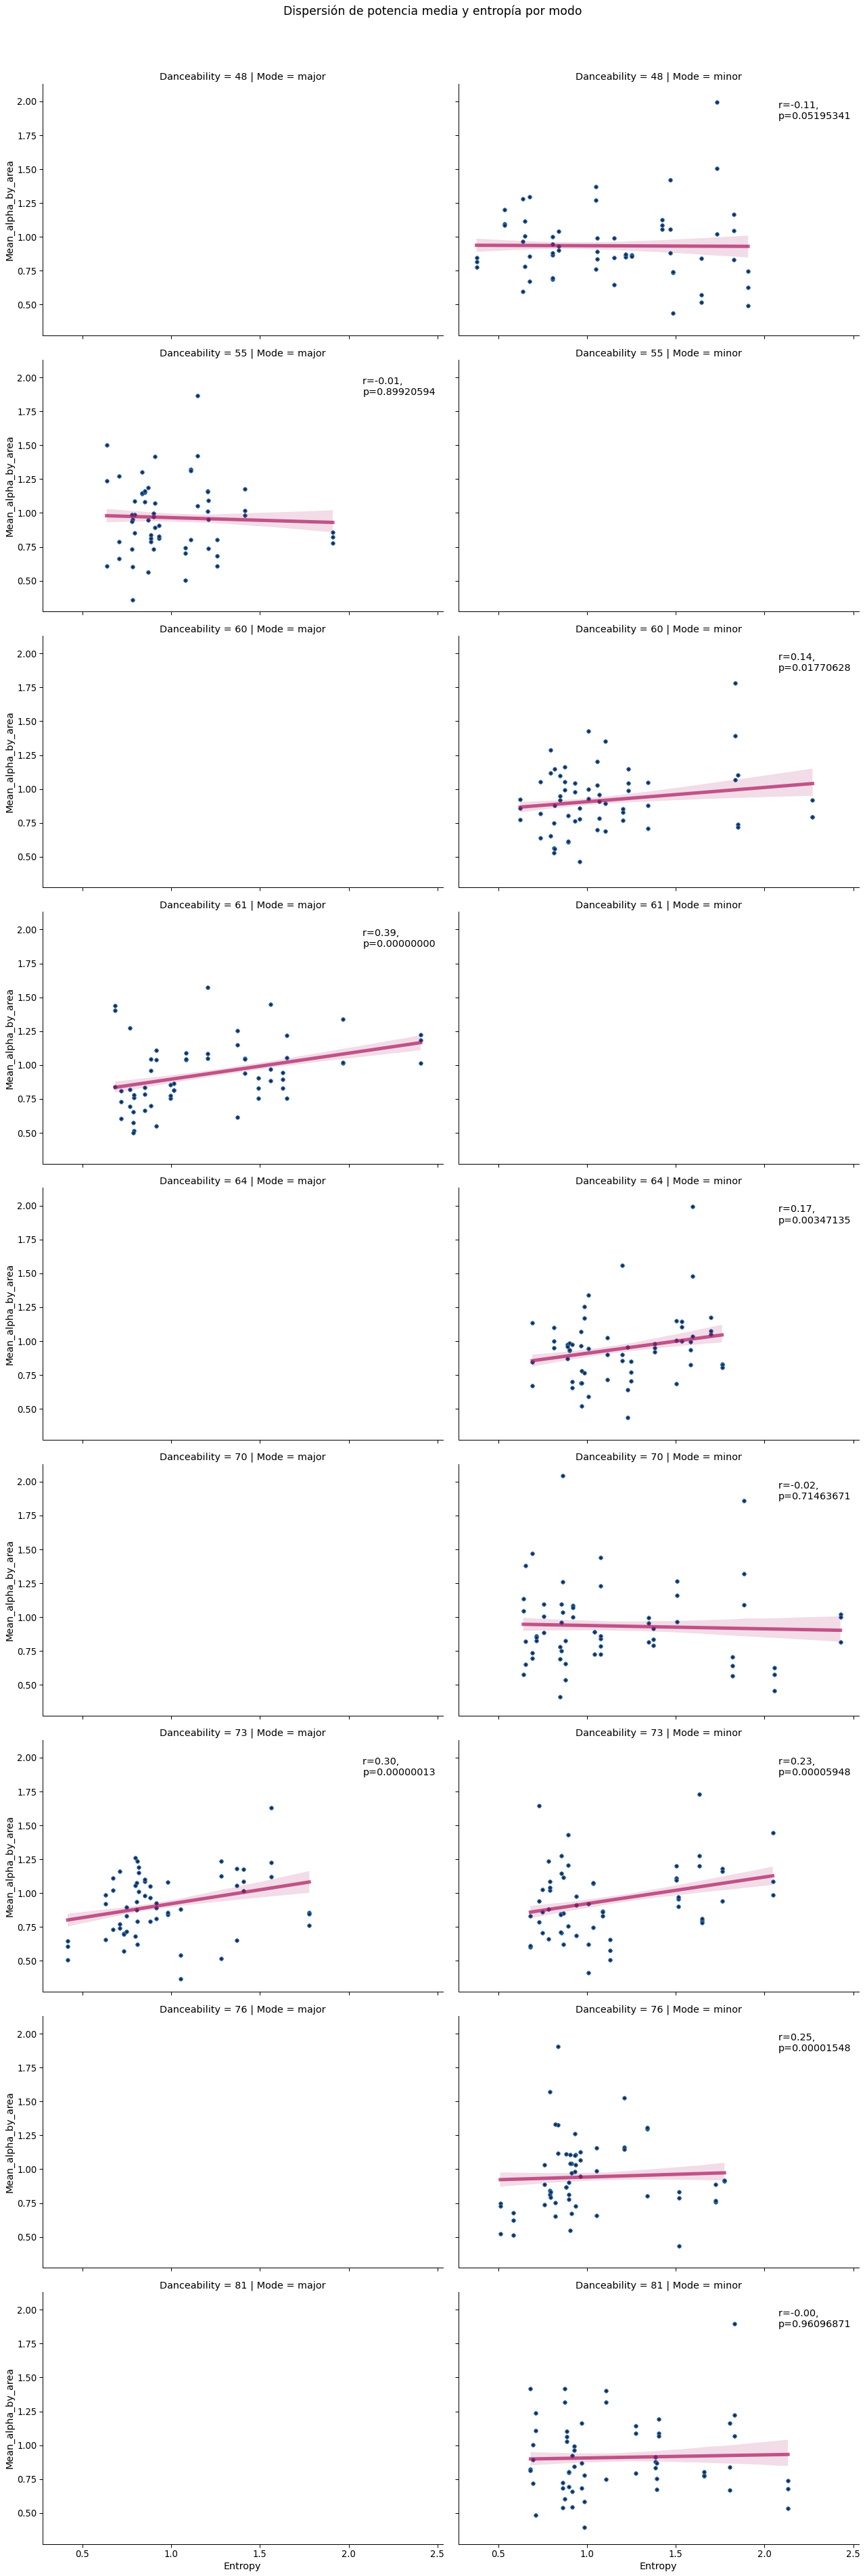

In [520]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_area', 
               data = data,
               height = 6,
               aspect = 1.5,
               row = 'Danceability',
               col = 'Mode',
               #hue = 'Tempo',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_area'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Dispersión de potencia media y entropía por modo')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

Probé 

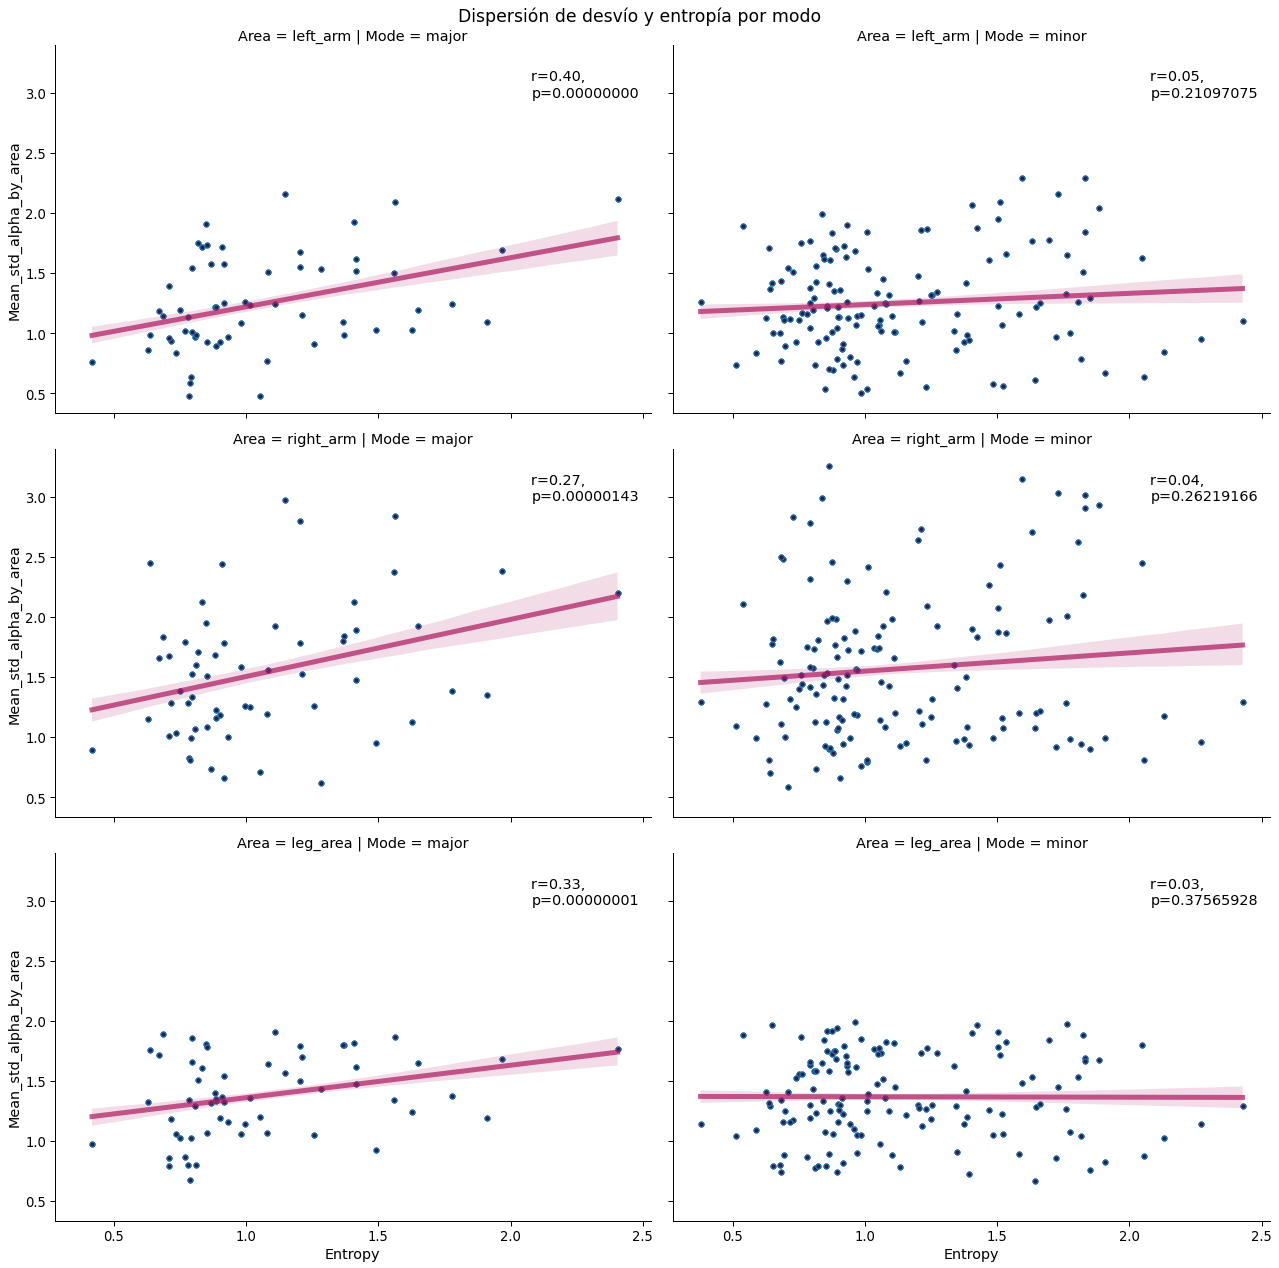

In [507]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_std_alpha_by_area', 
               data = data,
               height = 6,
               aspect = 1.5,
               row = 'Area',
               col = 'Mode',
               #hue = 'Song',
               palette = 'rocket',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_std_alpha_by_area'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Dispersión de desvío y entropía por modo')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

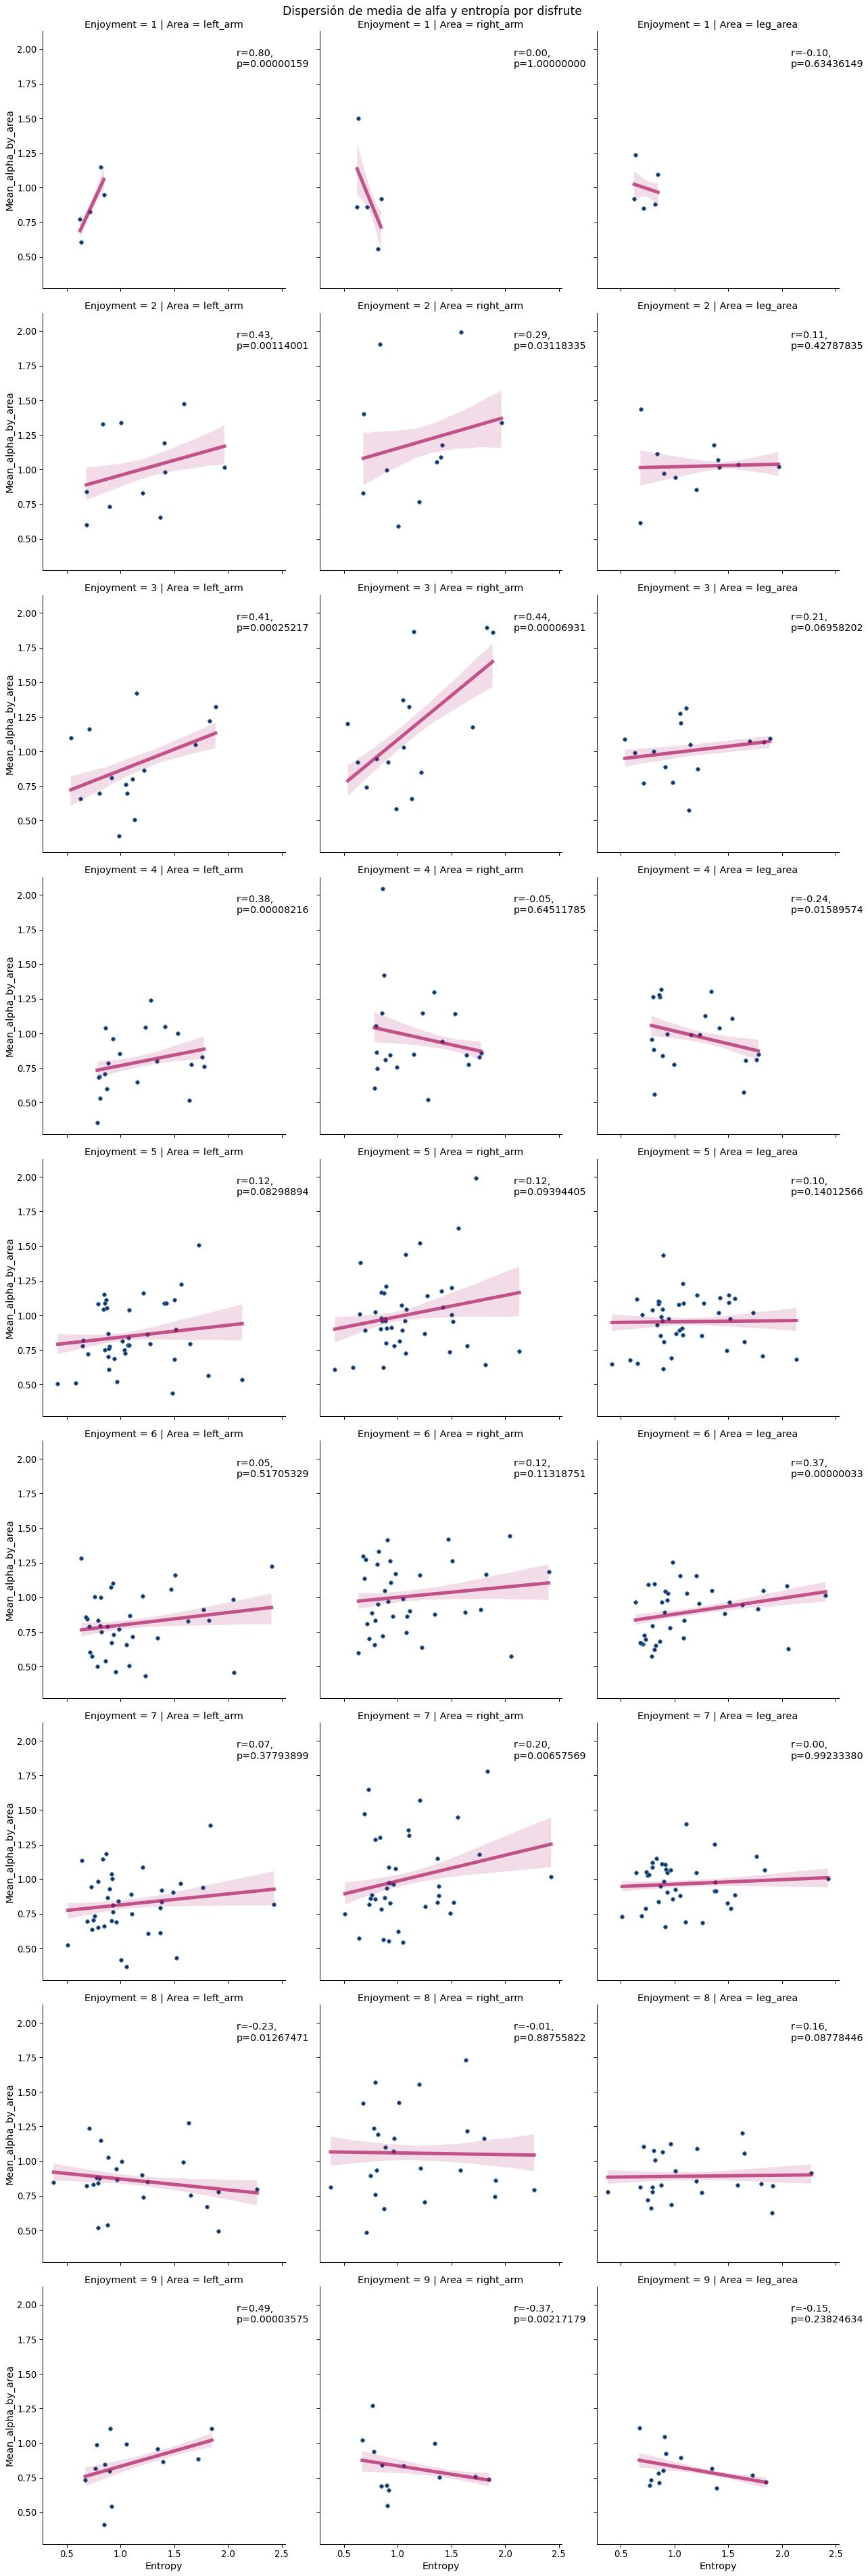

In [508]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_alpha_by_area', 
               data = data,
               height = 6,
               aspect = 1,
               row = 'Enjoyment',
               col = 'Area',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_alpha_by_area'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.97)
g.fig.suptitle('Dispersión de media de alfa y entropía por disfrute')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();

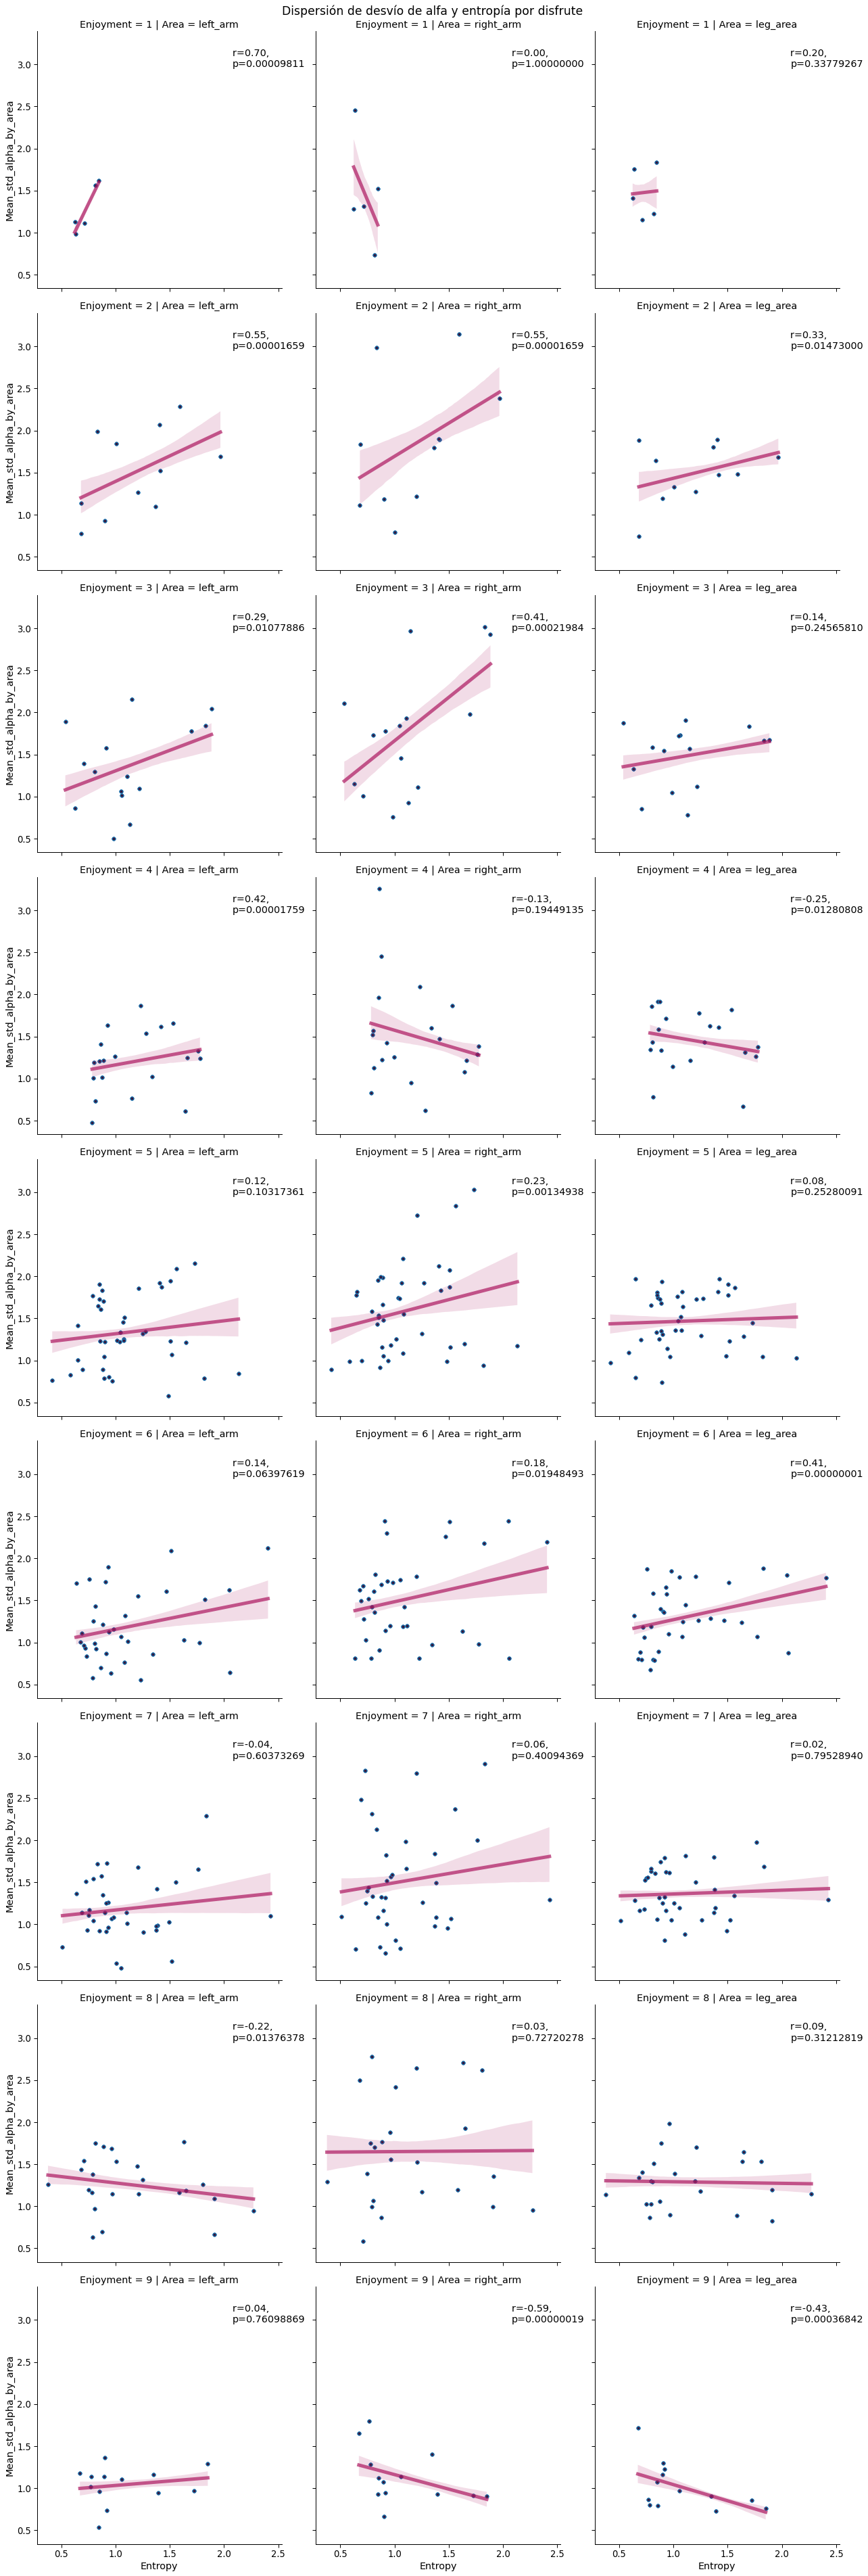

In [510]:
g = sns.lmplot(x ='Entropy', 
               y ='Mean_std_alpha_by_area', 
               data = data,
               height = 6,
               aspect = 1,
               row = 'Enjoyment',
               col = 'Area',
               line_kws={"color": '#ad1760', "alpha":0.7,"lw":5},
               scatter_kws = {'facecolors': '#35193e'}
              )

def annotate(data, **kws):
    r, p = stats.spearmanr(data['Entropy'], data['Mean_std_alpha_by_area'])
    ax = plt.gca()
    ax.text(.8, .86, 'r={:.2f}, \np={:.8f}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.97)
g.fig.suptitle('Dispersión de desvío de alfa y entropía por disfrute')
#g.axes.xlabel('Entropía')
#g.axes.ylabel('Desvío de alfa')
plt.show();